In [ ]:
import pandas as pd

df = pd.read_csv("stress_detection.csv")

#basic dataset details
print("=== Dataset Overview ===")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns (features): {df.shape[1]}")
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

#check missing vals
print("Are there any missing values in the dataset: ", df.isnull().any().any())

#stat summary of columns
print("\nStatistical summary of numeric columns:")
print(df.describe())

#show head
print("\nFirst 5 rows of the dataset:")
display(df.head())

=== Dataset Overview ===
Number of rows: 3000
Number of columns (features): 20

Number of duplicate rows: 0
Are there any missing values in the dataset:  False

Statistical summary of numeric columns:
       participant_id          day    PSS_score     Openness  \
count     3000.000000  3000.000000  3000.000000  3000.000000   
mean        50.500000    15.500000    24.701000     3.020663   
std         28.870882     8.656884     8.615781     1.159310   
min          1.000000     1.000000    10.000000     1.005003   
25%         25.750000     8.000000    17.000000     2.024510   
50%         50.500000    15.500000    25.000000     3.050115   
75%         75.250000    23.000000    32.000000     4.029171   
max        100.000000    30.000000    39.000000     4.997405   

       Conscientiousness  Extraversion  Agreeableness  Neuroticism  \
count        3000.000000   3000.000000    3000.000000  3000.000000   
mean            3.007883      3.002101       3.047659     2.963589   
std         

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132


In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

# Example: load your dataset
df = pd.read_csv('stress_detection.csv')

# Compute Z-scores for all numeric columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Find rows with any feature having |z| > 3 (common threshold)
outliers = (z_scores > 3).any(axis=1)

# Get outlier rows
outlier_rows = df[outliers]

print("Number of outlier rows:", len(outlier_rows))
print(outlier_rows)


Number of outlier rows: 0
Empty DataFrame
Columns: [participant_id, day, PSS_score, Openness, Conscientiousness, Extraversion, Agreeableness, Neuroticism, sleep_time, wake_time, sleep_duration, PSQI_score, call_duration, num_calls, num_sms, screen_on_time, skin_conductance, accelerometer, mobility_radius, mobility_distance]
Index: []


In [ ]:
import pandas as pd

df = pd.read_csv("stress_detection.csv")

num_participants = df['participant_id'].nunique()
days_per_participant = df.groupby('participant_id')['day'].nunique().mean()

total_datapoints = len(df)
total_labels = df['PSS_score'].nunique() #target label

datapoints_per_label = df['PSS_score'].value_counts()

# Input streams present in the dataset (check for columns containing typical sensor names)
sensor_columns = [col for col in df.columns if col.lower() in ['accelerometer', 'gyro', 'skin_conductance', 'eda', 'hr']]

#summary
summary = pd.DataFrame({
    'Metric': [
        'Number of participants',
        'Average days recorded per participant',
        'Total datapoints',
        'Total labels',
        'Datapoints per label',
        'Input streams'
    ],
    'Value': [
        num_participants,
        days_per_participant,
        total_datapoints,
        total_labels,
        datapoints_per_label.to_dict(),
        sensor_columns
    ]
})

summary


,Metric,Value
0,Number of participants,100
1,Average days recorded per participant,30.0
2,Total datapoints,3000
3,Total labels,30
4,Datapoints per label,"{33: 119, 17: 118, 38: 118, 14: 117, 30: 117, ..."
5,Input streams,"[skin_conductance, accelerometer]"


/tmp/ipython-input-1178348537.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='participant_id', y='PSS_score', palette='Set2')


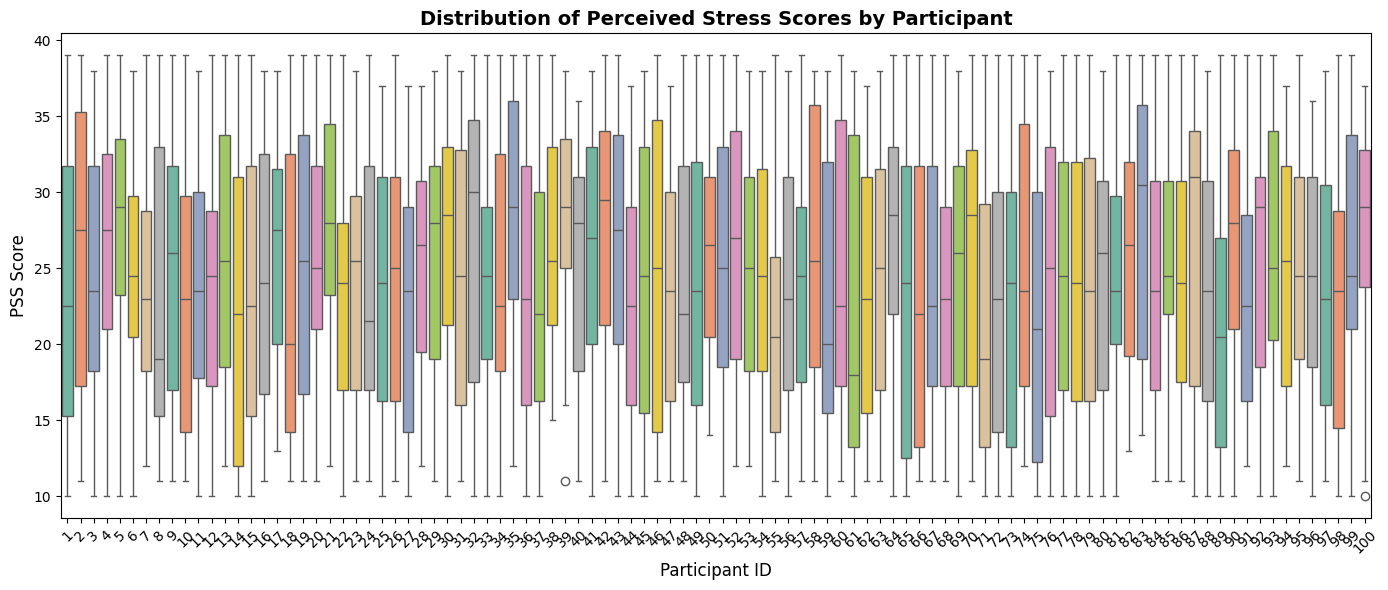

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("stress_detection.csv")

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='participant_id', y='PSS_score', palette='Set2')
plt.title('Distribution of Perceived Stress Scores by Participant', fontsize=14, fontweight='bold')
plt.xlabel('Participant ID', fontsize=12)
plt.ylabel('PSS Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Assuming your data is loaded as 'df'
# df = pd.read_csv('your_data.csv')

# SELECT 4 RANDOM PARTICIPANTS (set seed for reproducibility)
np.random.seed(42)  # Change this number to get different random participants
all_participants = df['participant_id'].unique()
selected_participants = np.random.choice(all_participants, size=min(4, len(all_participants)), replace=False)
df_subset = df[df['participant_id'].isin(selected_participants)].copy()

print("="*80)
print("SELECTED PARTICIPANTS FOR ANALYSIS:")
print("="*80)
for pid in selected_participants:
    n_obs = len(df_subset[df_subset['participant_id'] == pid])
    avg_stress = df_subset[df_subset['participant_id'] == pid]['PSS_score'].mean()
    print(f"Participant {pid}: {n_obs} observations, Avg PSS Score: {avg_stress:.2f}")
print("="*80)
print(f"\nTotal observations in subset: {len(df_subset)}")
print(f"Full dataset has {len(df)} observations from {len(all_participants)} participants")
print("="*80)
print("\n")

SELECTED PARTICIPANTS FOR ANALYSIS:
Participant 84: 30 observations, Avg PSS Score: 23.53
Participant 54: 30 observations, Avg PSS Score: 24.60
Participant 71: 30 observations, Avg PSS Score: 21.37
Participant 46: 30 observations, Avg PSS Score: 25.07

Total observations in subset: 120
Full dataset has 3000 observations from 100 participants




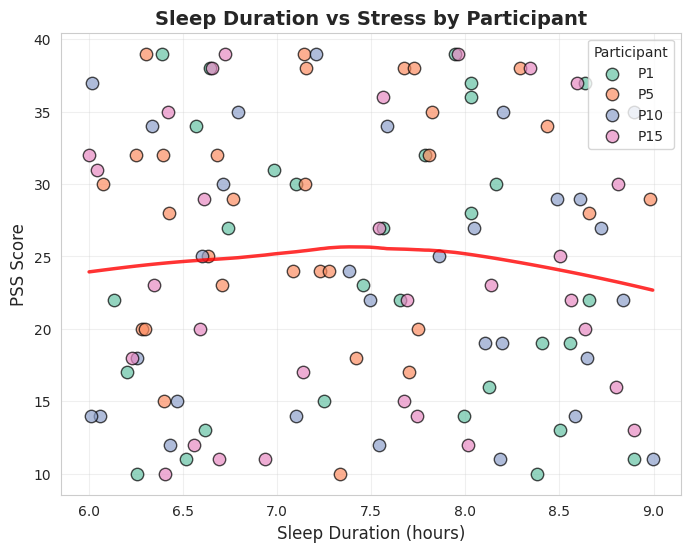

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("stress_detection.csv")

# --- Plot: Sleep Duration vs PSS ---
plt.figure(figsize=(8,6))

for pid in selected_participants:
    subset = df_subset[df_subset['participant_id'] == pid]
    plt.scatter(subset['sleep_duration'], subset['PSS_score'],
                color=color_map[pid], s=80, alpha=0.7, edgecolor='black', label=f'P{pid}')

sns.regplot(
    data=df_subset,
    x='sleep_duration',
    y='PSS_score',
    scatter=False,
    lowess=True,
    line_kws={'color':'red', 'linewidth':2.5, 'alpha':0.8}
)

plt.xlabel('Sleep Duration (hours)', fontsize=12)
plt.ylabel('PSS Score', fontsize=12)
plt.title('Sleep Duration vs Stress by Participant', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Participant')
plt.show()


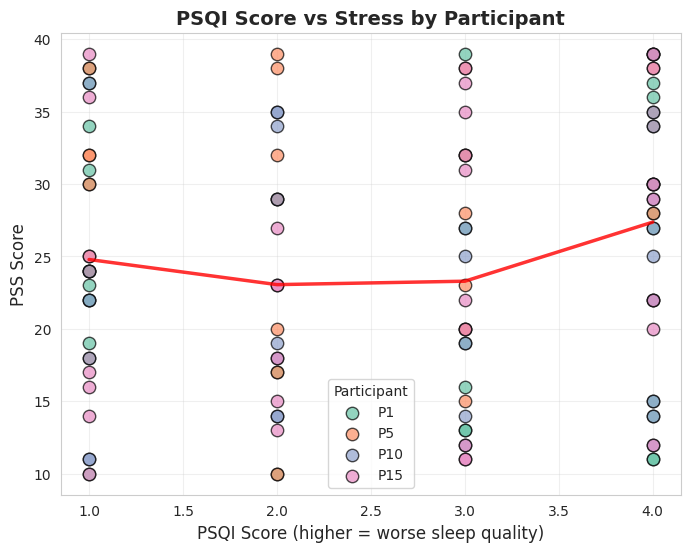

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("stress_detection.csv")

# --- Plot: PSQI Score vs PSS ---
plt.figure(figsize=(8,6))

for pid in selected_participants:
    subset = df_subset[df_subset['participant_id'] == pid]
    plt.scatter(subset['PSQI_score'], subset['PSS_score'],
                color=color_map[pid], s=80, alpha=0.7, edgecolor='black', label=f'P{pid}')

sns.regplot(
    data=df_subset,
    x='PSQI_score',
    y='PSS_score',
    scatter=False,
    lowess=True,
    line_kws={'color':'red', 'linewidth':2.5, 'alpha':0.8}
)

plt.xlabel('PSQI Score (higher = worse sleep quality)', fontsize=12)
plt.ylabel('PSS Score', fontsize=12)
plt.title('PSQI Score vs Stress by Participant', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Participant')
plt.show()


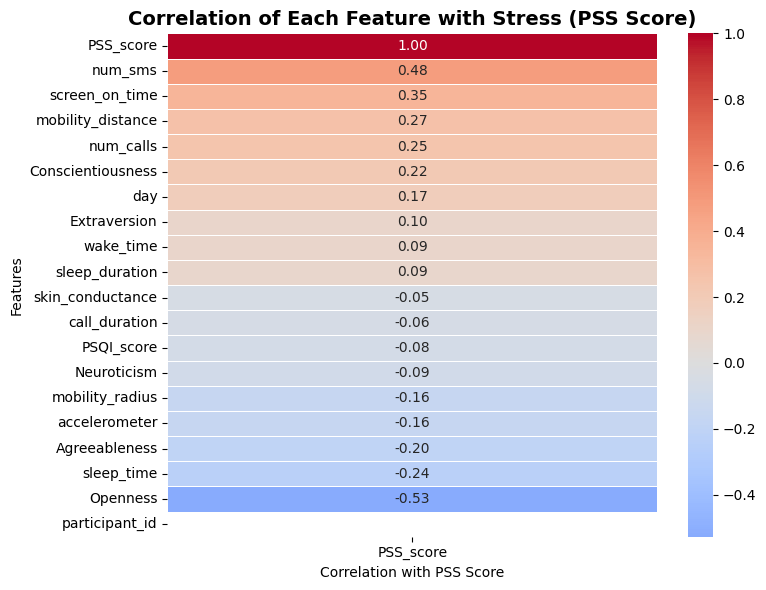

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("stress_detection.csv")

# Compute daily averages to smooth per-day variations
daily_stats = df.groupby('day').mean(numeric_only=True).reset_index()

# Calculate correlation matrix
corr = daily_stats.corr(method='spearman')

# Plot heatmap for only correlations with PSS_score
plt.figure(figsize=(8,6))
sns.heatmap(
    corr[['PSS_score']].sort_values(by='PSS_score', ascending=False),
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation of Each Feature with Stress (PSS Score)', fontsize=14, fontweight='bold')
plt.ylabel('Features')
plt.xlabel('Correlation with PSS Score')
plt.tight_layout()
plt.show()


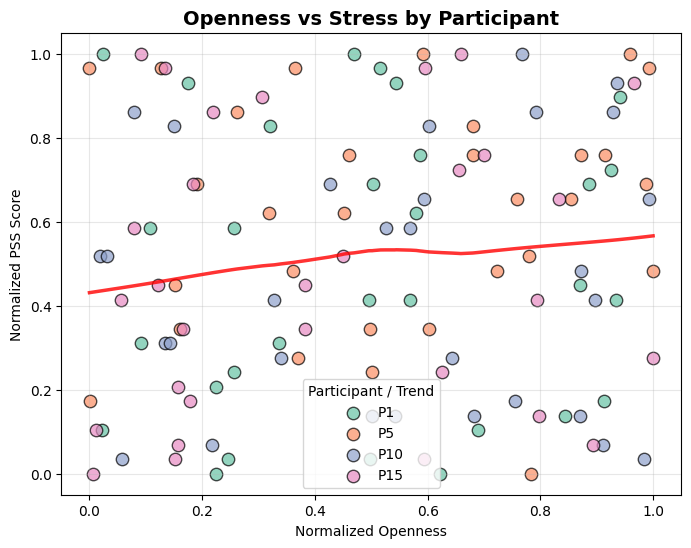

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("stress_detection.csv")

# Select subset of participants
selected_participants = [1, 5, 10, 15]
df_subset = df[df['participant_id'].isin(selected_participants)].copy()

# Assign colors for each participant
colors = sns.color_palette("Set2", len(selected_participants))
color_map = {pid: colors[idx] for idx, pid in enumerate(selected_participants)}
df_subset['color'] = df_subset['participant_id'].map(color_map)

# Normalize the columns
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df_subset['Openness_norm'] = normalize(df_subset['Openness'])
df_subset['PSS_norm'] = normalize(df_subset['PSS_score'])

# Plot normalized Openness vs normalized PSS
plt.figure(figsize=(8,6))

# Scatter points per participant
for pid in selected_participants:
    subset = df_subset[df_subset['participant_id'] == pid]
    plt.scatter(subset['Openness_norm'], subset['PSS_norm'],
                color=color_map[pid], s=80, alpha=0.7, edgecolor='black', label=f'P{pid}')

# Add LOWESS trend line
sns.regplot(
    data=df_subset,
    x='Openness_norm',
    y='PSS_norm',
    scatter=False,
    lowess=True,
    line_kws={'color':'red', 'linewidth':2.5, 'alpha':0.8, 'label':'LOWESS Trend'}
)

plt.xlabel('Normalized Openness')
plt.ylabel('Normalized PSS Score')
plt.title('Openness vs Stress by Participant', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Participant / Trend')
plt.show()


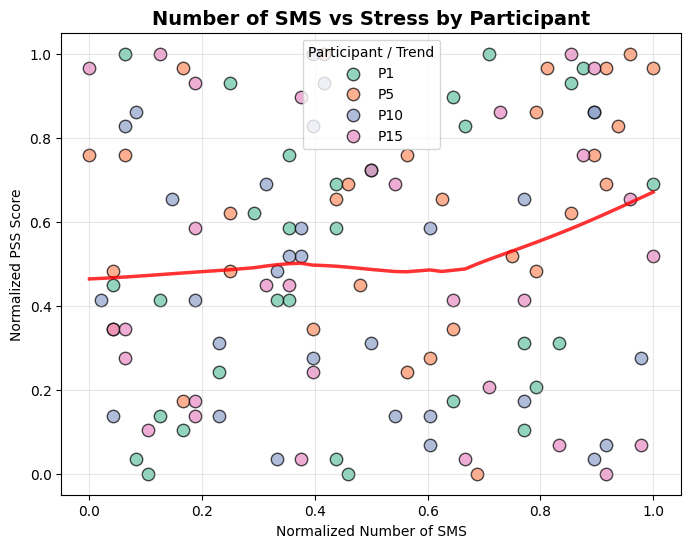

In [ ]:
# Normalize the columns
df_subset['num_sms_norm'] = (df_subset['num_sms'] - df_subset['num_sms'].min()) / (df_subset['num_sms'].max() - df_subset['num_sms'].min())
df_subset['PSS_norm'] = (df_subset['PSS_score'] - df_subset['PSS_score'].min()) / (df_subset['PSS_score'].max() - df_subset['PSS_score'].min())

# Plot normalized num_sms vs normalized PSS
plt.figure(figsize=(8,6))
for pid in selected_participants:
    subset = df_subset[df_subset['participant_id'] == pid]
    plt.scatter(subset['num_sms_norm'], subset['PSS_norm'],
                color=color_map[pid], s=80, alpha=0.7, edgecolor='black', label=f'P{pid}')

# Add LOWESS trend line
sns.regplot(
    data=df_subset,
    x='num_sms_norm',
    y='PSS_norm',
    scatter=False,
    lowess=True,
    line_kws={'color':'red', 'linewidth':2.5, 'alpha':0.8, 'label':'LOWESS Trend'}
)

plt.xlabel('Normalized Number of SMS')
plt.ylabel('Normalized PSS Score')
plt.title('Number of SMS vs Stress by Participant', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Participant / Trend')
plt.show()


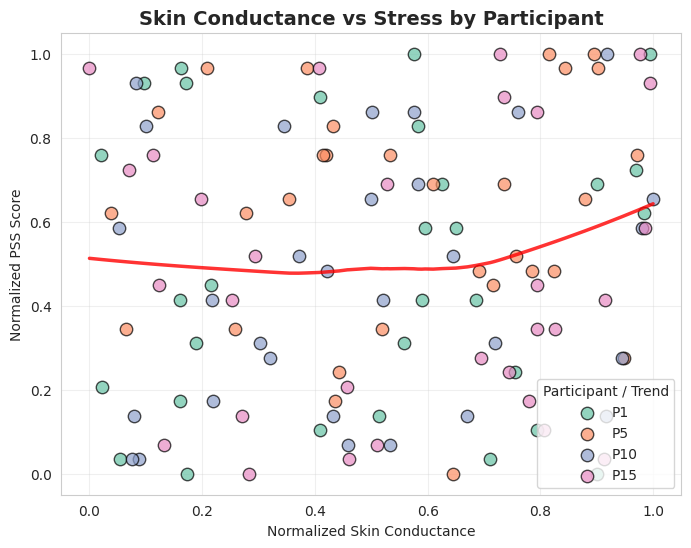

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("stress_detection.csv")

# Select subset of participants
selected_participants = [1, 5, 10, 15]
df_subset = df[df['participant_id'].isin(selected_participants)].copy()

# Assign colors for each participant
colors = sns.color_palette("Set2", len(selected_participants))
color_map = {pid: colors[idx] for idx, pid in enumerate(selected_participants)}
df_subset['color'] = df_subset['participant_id'].map(color_map)

# Normalize columns
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df_subset['skin_norm'] = normalize(df_subset['skin_conductance'])
df_subset['PSS_norm'] = normalize(df_subset['PSS_score'])

# Plot Skin Conductance vs PSS
plt.figure(figsize=(8,6))
for pid in selected_participants:
    subset = df_subset[df_subset['participant_id'] == pid]
    plt.scatter(subset['skin_norm'], subset['PSS_norm'],
                color=color_map[pid], s=80, alpha=0.7, edgecolor='black', label=f'P{pid}')

# LOWESS trend line
sns.regplot(
    data=df_subset,
    x='skin_norm',
    y='PSS_norm',
    scatter=False,
    lowess=True,
    line_kws={'color':'red', 'linewidth':2.5, 'alpha':0.8, 'label':'LOWESS Trend'}
)

plt.xlabel('Normalized Skin Conductance')
plt.ylabel('Normalized PSS Score')
plt.title('Skin Conductance vs Stress by Participant', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Participant / Trend')
plt.show()


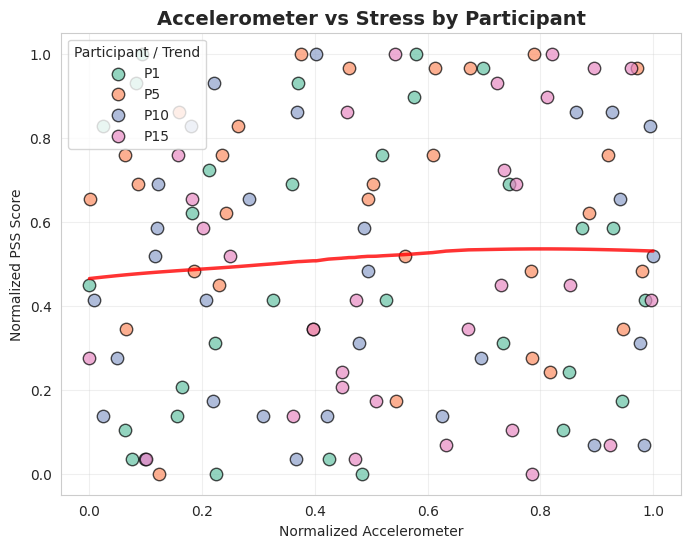

In [ ]:
# Normalize accelerometer
df_subset['accel_norm'] = normalize(df_subset['accelerometer'])
df_subset['PSS_norm'] = normalize(df_subset['PSS_score'])  # already normalized but safe to re-assign

# Plot Accelerometer vs PSS
plt.figure(figsize=(8,6))
for pid in selected_participants:
    subset = df_subset[df_subset['participant_id'] == pid]
    plt.scatter(subset['accel_norm'], subset['PSS_norm'],
                color=color_map[pid], s=80, alpha=0.7, edgecolor='black', label=f'P{pid}')

# LOWESS trend line
sns.regplot(
    data=df_subset,
    x='accel_norm',
    y='PSS_norm',
    scatter=False,
    lowess=True,
    line_kws={'color':'red', 'linewidth':2.5, 'alpha':0.8, 'label':'LOWESS Trend'}
)

plt.xlabel('Normalized Accelerometer')
plt.ylabel('Normalized PSS Score')
plt.title('Accelerometer vs Stress by Participant', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Participant / Trend')
plt.show()


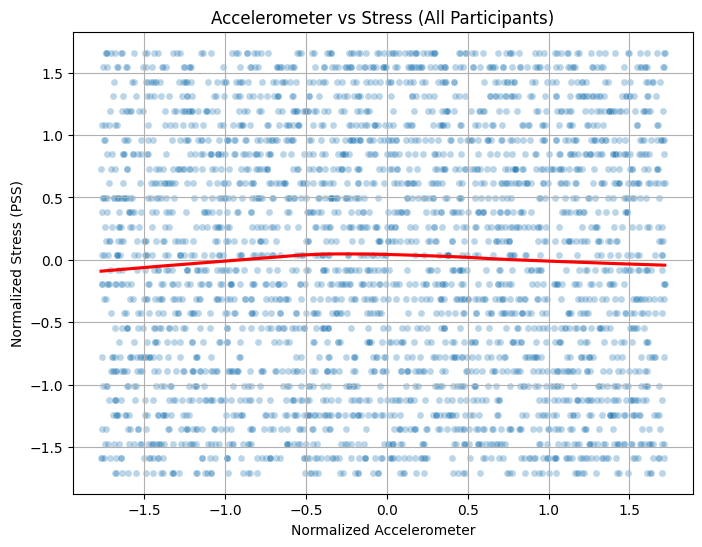

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming your dataframe is called `df`
# and it has columns: 'participant_id', 'accelerometer', 'pss'

# 1. Normalize features across all participants
scaler = StandardScaler()
df[['accel_norm', 'pss_norm']] = scaler.fit_transform(df[['accelerometer', 'PSS_score']])

# 2. Plot accelerometer vs stress for all participants
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='accel_norm', y='pss_norm', alpha=0.3, s=25)
sns.regplot(data=df, x='accel_norm', y='pss_norm', scatter=False, lowess=True, color='red')

plt.title("Accelerometer vs Stress (All Participants)")
plt.xlabel("Normalized Accelerometer")
plt.ylabel("Normalized Stress (PSS)")
plt.grid(True)
plt.show()


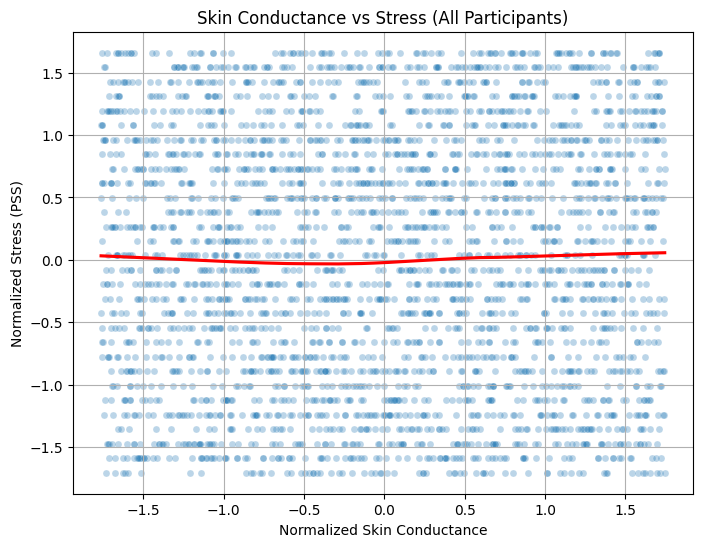

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming your dataframe is called df and has columns:
# 'participant_id', 'skin_conductance', 'pss'

# 1. Normalize skin conductance and stress (across all participants)
scaler = StandardScaler()
df[['sc_norm', 'pss_norm']] = scaler.fit_transform(df[['skin_conductance', 'PSS_score']])

# 2. Plot scatter with LOWESS smoothing line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sc_norm', y='pss_norm', alpha=0.3, s=25)
sns.regplot(
    data=df,
    x='sc_norm',
    y='pss_norm',
    scatter=False,
    lowess=True,
    color='red'
)

plt.title("Skin Conductance vs Stress (All Participants)")
plt.xlabel("Normalized Skin Conductance")
plt.ylabel("Normalized Stress (PSS)")
plt.grid(True)
plt.show()


   participant_id  day  PSS_score  Openness  Conscientiousness  Extraversion  \
0               1    1         34  2.322732           4.332193      1.185878   
1               1    2         37  1.761436           3.254120      3.907281   
2               1    3         30  3.025887           1.855002      2.045900   
3               1    4         16  1.948370           4.966676      3.345225   
4               1    5         32  3.343484           2.065936      3.137843   

   Agreeableness  Neuroticism  sleep_time  wake_time  sleep_duration  \
0       1.570213     3.782094    7.726792   5.190660        6.572069   
1       4.072512     1.997145    7.312674   6.170717        8.030168   
2       2.317493     3.619225    6.992060   5.318825        7.102420   
3       1.607756     3.583524    8.886914   8.061075        8.123294   
4       2.118061     2.567347    7.811705   7.312145        7.785143   

   PSQI_score  call_duration  num_calls  num_sms  screen_on_time  \
0           1     

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: 

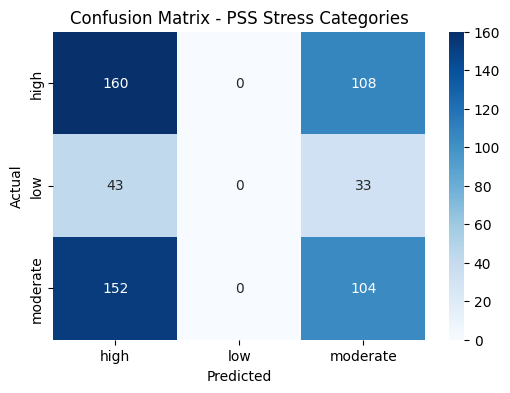


--- Top Predictive Features ---
              Feature  Coefficient
11            num_sms     0.047935
1   Conscientiousness     0.046131
0            Openness     0.038083
4         Neuroticism     0.035294
15    mobility_radius     0.024238
14      accelerometer     0.014286
13   skin_conductance     0.009499
3       Agreeableness     0.008868
12     screen_on_time     0.006181
6           wake_time     0.000046


In [ ]:
# ==========================
# Logistic Regression on PSS Stress Categories
# ==========================

# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load dataset
# Replace 'your_dataset.csv' with your actual filename
df = pd.read_csv('stress_detection.csv')

# 3. Inspect data
print(df.head())
print(df.info())

# 4. Create categorical labels based on PSS cutoffs
def categorize_pss(score):
    if score <= 13:
        return "low"
    elif score <= 26:
        return "moderate"
    else:
        return "high"

df["stress_level"] = df["PSS_score"].apply(categorize_pss)

# 5. Encode target variable
le = LabelEncoder()
df["stress_label"] = le.fit_transform(df["stress_level"])
print("\nLabel mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# 6. Select features (exclude identifiers)
feature_cols = [
    "Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism",
    "sleep_time", "wake_time", "sleep_duration", "PSQI_score",
    "call_duration", "num_calls", "num_sms", "screen_on_time",
    "skin_conductance", "accelerometer", "mobility_radius", "mobility_distance"
]

X = df[feature_cols]
y = df["stress_label"]

# 7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 8. Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 9. Train logistic regression model
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train_scaled, y_train)

# 10. Predictions
y_pred = logreg.predict(X_test_scaled)

# 11. Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# 12. Print detailed classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 13. Print summary metrics
print("\n--- Summary Metrics ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro):    {recall_macro:.4f}")
print(f"F1 Score (Macro):  {f1_macro:.4f}")
print(f"Precision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Weighted):    {recall_weighted:.4f}")
print(f"F1 Score (Weighted):  {f1_weighted:.4f}")

# 14. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - PSS Stress Categories")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 15. Feature importance (optional)
importance = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': logreg.coef_[0]
})
importance = importance.sort_values(by='Coefficient', ascending=False)
print("\n--- Top Predictive Features ---")
print(importance.head(10))


=== Random Forest Performance ===
Accuracy : 0.438
Precision: 0.457
Recall   : 0.337
F1 Score : 0.318

Classification Report:
               precision    recall  f1-score   support

        high       0.45      0.56      0.50       268
         low       0.50      0.01      0.03        76
    moderate       0.42      0.43      0.43       256

    accuracy                           0.44       600
   macro avg       0.46      0.34      0.32       600
weighted avg       0.44      0.44      0.41       600



/tmp/ipython-input-4276082689.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(features)[indices], palette="viridis")


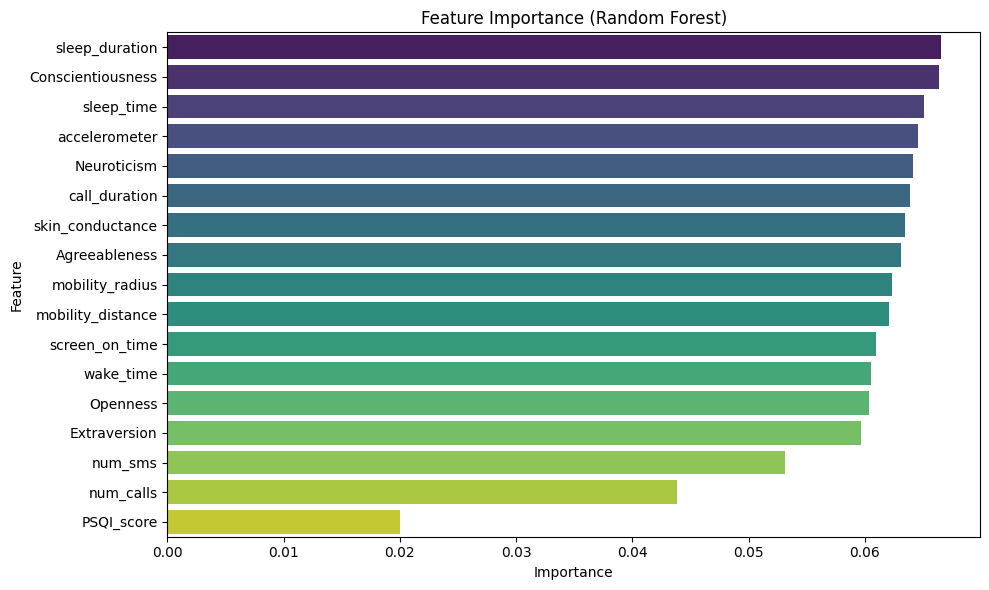

In [ ]:
# ===============================================
# Random Forest Model for Stress Classification
# ===============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================================
# 1. Load Data
# ===============================================
# Replace this with your actual data path
df = pd.read_csv("stress_detection.csv")

# ===============================================
# 2. Create Stress Level Label (Cohen & Williamson)
# ===============================================
def stress_label(score):
    if score <= 13:
        return "low"
    elif 14 <= score <= 26:
        return "moderate"
    else:
        return "high"

df["stress_level"] = df["PSS_score"].apply(stress_label)

# ===============================================
# 3. Select Features
# ===============================================
features = [
    "Openness","Conscientiousness","Extraversion","Agreeableness","Neuroticism",
    "sleep_time","wake_time","sleep_duration","PSQI_score","call_duration",
    "num_calls","num_sms","screen_on_time","skin_conductance",
    "accelerometer","mobility_radius","mobility_distance"
]
X = df[features]
y = df["stress_level"]

# ===============================================
# 4. Train/Test Split
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================================
# 5. Feature Scaling (optional for RF but helps stability)
# ===============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================================
# 6. Train Random Forest Model
# ===============================================
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_scaled, y_train)

# ===============================================
# 7. Evaluate Model
# ===============================================
y_pred = rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("=== Random Forest Performance ===")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1 Score : {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ===============================================
# 8. Feature Importance Plot
# ===============================================
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=np.array(features)[indices], palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

=== SVM Model Performance ===
Accuracy : 0.388
Precision: 0.336
Recall   : 0.337
F1 Score : 0.336

Classification Report:
               precision    recall  f1-score   support

        high       0.42      0.39      0.41       268
         low       0.14      0.17      0.15        76
    moderate       0.45      0.45      0.45       256

    accuracy                           0.39       600
   macro avg       0.34      0.34      0.34       600
weighted avg       0.40      0.39      0.39       600



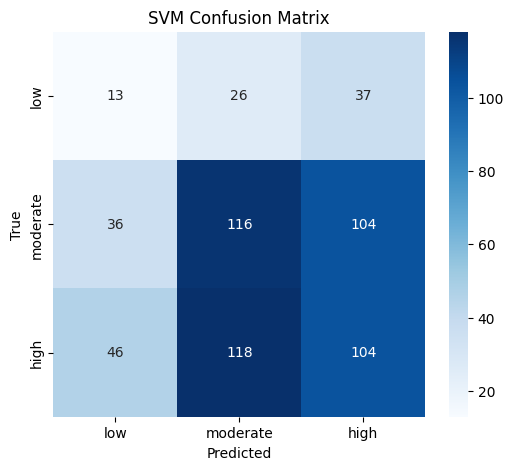

In [ ]:
# ===============================================
# SVM Model for Stress Classification (PSS)
# ===============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================================
# 1. Load Data
# ===============================================
# Replace with your actual data file
df = pd.read_csv("stress_detection.csv")

# ===============================================
# 2. Create Stress Level Label (Cohen & Williamson Split)
# ===============================================
def stress_label(score):
    if score <= 13:
        return "low"
    elif 14 <= score <= 26:
        return "moderate"
    else:
        return "high"

df["stress_level"] = df["PSS_score"].apply(stress_label)

# ===============================================
# 3. Select Features
# ===============================================
features = [
    "Openness","Conscientiousness","Extraversion","Agreeableness","Neuroticism",
    "sleep_time","wake_time","sleep_duration","PSQI_score","call_duration",
    "num_calls","num_sms","screen_on_time","skin_conductance",
    "accelerometer","mobility_radius","mobility_distance"
]
X = df[features]
y = df["stress_level"]

# ===============================================
# 4. Train/Test Split
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================================
# 5. Feature Scaling (Critical for SVM)
# ===============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================================
# 6. Define and Train SVM Model
# ===============================================
# Start with a Radial Basis Function (RBF) kernel
svm = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)

# Optional: Grid Search for best hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(svm, param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

best_svm = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# ===============================================
# 7. Evaluate Model
# ===============================================
y_pred = best_svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\n=== SVM Model Performance ===")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1 Score : {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ===============================================
# 8. Confusion Matrix
# ===============================================
cm = confusion_matrix(y_test, y_pred, labels=["low","moderate","high"])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["low","moderate","high"], yticklabels=["low","moderate","high"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM Confusion Matrix")
plt.show()


=== Class Counts ===
stress_level
high        1342
moderate    1280
low          378
Name: count, dtype: int64

=== Class Percentages ===
stress_level
high        44.733333
moderate    42.666667
low         12.600000
Name: proportion, dtype: float64


/tmp/ipython-input-630783455.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="stress_level", data=df, order=["low","moderate","high"], palette="viridis")


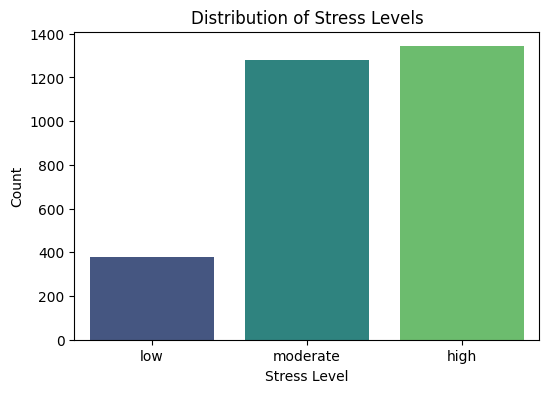

In [ ]:
# Check distribution of stress levels
label_counts = df["stress_level"].value_counts()
label_percent = df["stress_level"].value_counts(normalize=True) * 100

print("=== Class Counts ===")
print(label_counts)
print("\n=== Class Percentages ===")
print(label_percent)

# Optional: plot distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="stress_level", data=df, order=["low","moderate","high"], palette="viridis")
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()


Before SMOTE: stress_level
high        1074
moderate    1024
low          302
Name: count, dtype: int64
After SMOTE : stress_level
moderate    1074
low         1074
high        1074
Name: count, dtype: int64

=== Random Forest + SMOTE Performance ===
Accuracy : 0.400
Precision: 0.333
Recall   : 0.327
F1 Score : 0.326

Classification Report:
               precision    recall  f1-score   support

        high       0.45      0.47      0.46       268
         low       0.16      0.09      0.12        76
    moderate       0.39      0.41      0.40       256

    accuracy                           0.40       600
   macro avg       0.33      0.33      0.33       600
weighted avg       0.39      0.40      0.39       600



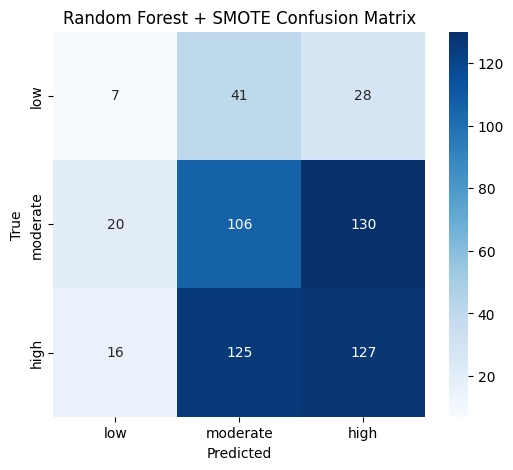

/tmp/ipython-input-3024541459.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(features)[indices], palette="viridis")


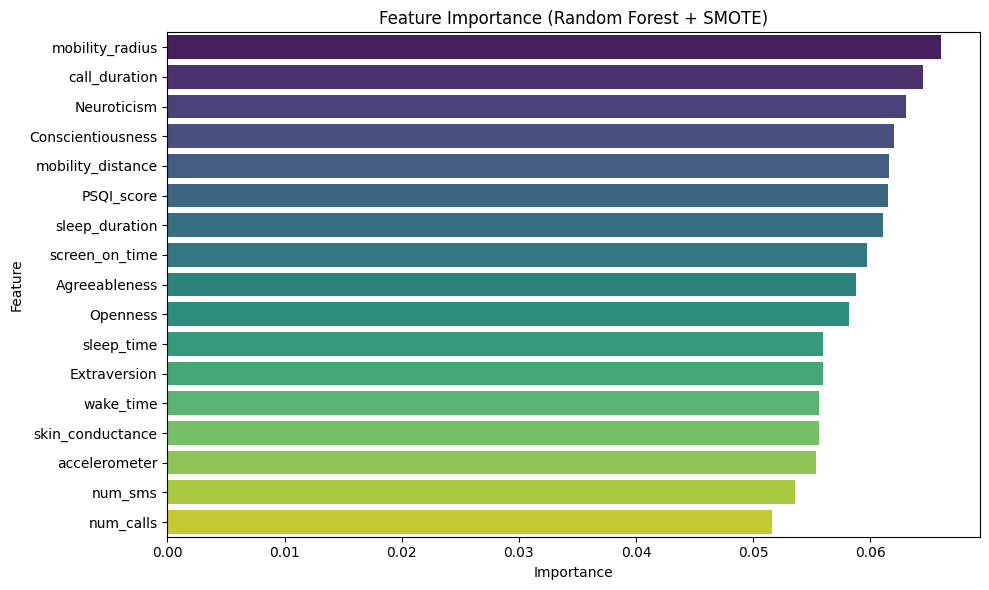

In [ ]:
# ===============================================
# Random Forest with SMOTE for Imbalanced Stress Classification
# ===============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================================
# 1. Load dataset
# ===============================================
df = pd.read_csv("stress_detection.csv")  # replace with your dataset path

# ===============================================
# 2. Create stress level labels
# ===============================================
def stress_label(score):
    if score <= 13:
        return "low"
    elif 14 <= score <= 26:
        return "moderate"
    else:
        return "high"

df["stress_level"] = df["PSS_score"].apply(stress_label)

# ===============================================
# 3. Select features
# ===============================================
features = [
    "Openness","Conscientiousness","Extraversion","Agreeableness","Neuroticism",
    "sleep_time","wake_time","sleep_duration","PSQI_score","call_duration",
    "num_calls","num_sms","screen_on_time","skin_conductance",
    "accelerometer","mobility_radius","mobility_distance"
]
X = df[features]
y = df["stress_level"]

# ===============================================
# 4. Train/Test Split
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================================
# 5. Feature Scaling (optional for RF, not critical)
# ===============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================================
# 6. Apply SMOTE to balance training set
# ===============================================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE :", pd.Series(y_train_res).value_counts())

# ===============================================
# 7. Train Random Forest Model
# ===============================================
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",  # optional since SMOTE balances classes
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_res, y_train_res)

# ===============================================
# 8. Evaluate Model
# ===============================================
y_pred = rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\n=== Random Forest + SMOTE Performance ===")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1 Score : {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ===============================================
# 9. Confusion Matrix
# ===============================================
cm = confusion_matrix(y_test, y_pred, labels=["low","moderate","high"])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["low","moderate","high"],
            yticklabels=["low","moderate","high"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest + SMOTE Confusion Matrix")
plt.show()

# ===============================================
# 10. Feature Importance
# ===============================================
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=np.array(features)[indices], palette="viridis")
plt.title("Feature Importance (Random Forest + SMOTE)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Before SMOTE: stress_level
high        1074
moderate    1024
low          302
Name: count, dtype: int64
After SMOTE : stress_level
moderate    1074
low         1074
high        1074
Name: count, dtype: int64

=== Random Forest + SMOTE + Temporal Features ===
Accuracy : 0.395
Precision: 0.323
Recall   : 0.323
F1 Score : 0.323

Classification Report:
               precision    recall  f1-score   support

        high       0.43      0.43      0.43       268
         low       0.11      0.09      0.10        76
    moderate       0.42      0.45      0.44       256

    accuracy                           0.40       600
   macro avg       0.32      0.32      0.32       600
weighted avg       0.39      0.40      0.39       600



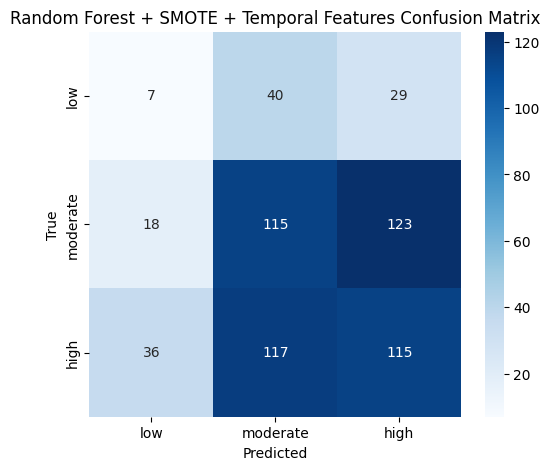

/tmp/ipython-input-2171088731.py:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(features)[indices], palette="viridis")


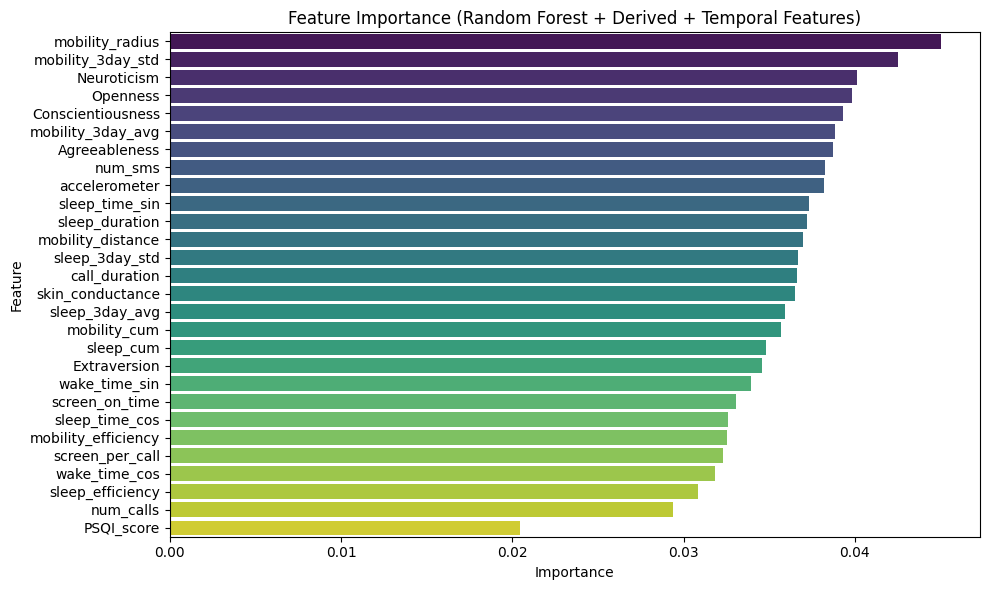

In [ ]:
# ===============================================
# Random Forest + SMOTE with Derived & Temporal Features
# ===============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================================
# 1. Load dataset
# ===============================================
df = pd.read_csv("stress_detection.csv")  # replace with your dataset path

# ===============================================
# 2. Create stress level labels
# ===============================================
def stress_label(score):
    if score <= 13:
        return "low"
    elif 14 <= score <= 26:
        return "moderate"
    else:
        return "high"

df["stress_level"] = df["PSS_score"].apply(stress_label)

# ===============================================
# 3. Derived Features
# ===============================================
# --- Ratios ---
df["screen_per_call"] = df["screen_on_time"] / (df["num_calls"] + 1)
df["mobility_efficiency"] = df["mobility_distance"] / (df["mobility_radius"] + 1)
df["sleep_efficiency"] = df["sleep_duration"] / (df["PSQI_score"] + 1)

# --- Cyclic encoding for sleep/wake time ---
df["sleep_time_sin"] = np.sin(2 * np.pi * df["sleep_time"]/24)
df["sleep_time_cos"] = np.cos(2 * np.pi * df["sleep_time"]/24)
df["wake_time_sin"] = np.sin(2 * np.pi * df["wake_time"]/24)
df["wake_time_cos"] = np.cos(2 * np.pi * df["wake_time"]/24)

# ===============================================
# 4. Temporal Features (Rolling / Cumulative)
# ===============================================
df.sort_values(["participant_id", "day"], inplace=True)  # ensure chronological order

# --- Rolling averages and std (3-day window) ---
df["sleep_3day_avg"] = df.groupby("participant_id")["sleep_duration"].transform(lambda x: x.rolling(3, 1).mean())
df["mobility_3day_avg"] = df.groupby("participant_id")["mobility_distance"].transform(lambda x: x.rolling(3, 1).mean())
df["sleep_3day_std"] = df.groupby("participant_id")["sleep_duration"].transform(lambda x: x.rolling(3, 1).std())
df["mobility_3day_std"] = df.groupby("participant_id")["mobility_distance"].transform(lambda x: x.rolling(3, 1).std())

# --- Cumulative sums (optional) ---
df["sleep_cum"] = df.groupby("participant_id")["sleep_duration"].cumsum()
df["mobility_cum"] = df.groupby("participant_id")["mobility_distance"].cumsum()

# Fill NaN from std with 0
df.fillna(0, inplace=True)

# ===============================================
# 5. Select Features
# ===============================================
features = [
    "Openness","Conscientiousness","Extraversion","Agreeableness","Neuroticism",
    "sleep_duration","PSQI_score","call_duration","num_calls","num_sms","screen_on_time",
    "skin_conductance","accelerometer","mobility_radius","mobility_distance",
    "screen_per_call","mobility_efficiency","sleep_efficiency",
    "sleep_time_sin","sleep_time_cos","wake_time_sin","wake_time_cos",
    "sleep_3day_avg","mobility_3day_avg","sleep_3day_std","mobility_3day_std",
    "sleep_cum","mobility_cum"
]
X = df[features]
y = df["stress_level"]

# ===============================================
# 6. Train/Test Split
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================================
# 7. Feature Scaling (optional for RF)
# ===============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================================
# 8. Apply SMOTE
# ===============================================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE :", pd.Series(y_train_res).value_counts())

# ===============================================
# 9. Train Random Forest Model
# ===============================================
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_res, y_train_res)

# ===============================================
# 10. Evaluate Model
# ===============================================
y_pred = rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\n=== Random Forest + SMOTE + Temporal Features ===")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1 Score : {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ===============================================
# 11. Confusion Matrix
# ===============================================
cm = confusion_matrix(y_test, y_pred, labels=["low","moderate","high"])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["low","moderate","high"],
            yticklabels=["low","moderate","high"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest + SMOTE + Temporal Features Confusion Matrix")
plt.show()

# ===============================================
# 12. Feature Importance
# ===============================================
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=np.array(features)[indices], palette="viridis")
plt.title("Feature Importance (Random Forest + Derived + Temporal Features)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Before SMOTE: stress_level
high        1074
moderate    1024
low          302
Name: count, dtype: int64
After SMOTE : stress_level
moderate    1074
low         1074
high        1074
Name: count, dtype: int64

=== SVM + SMOTE + Derived & Temporal Features ===
Accuracy : 0.375
Precision: 0.310
Recall   : 0.308
F1 Score : 0.309

Classification Report:
               precision    recall  f1-score   support

        high       0.40      0.39      0.39       268
         low       0.08      0.09      0.09        76
    moderate       0.45      0.44      0.44       256

    accuracy                           0.38       600
   macro avg       0.31      0.31      0.31       600
weighted avg       0.38      0.38      0.38       600



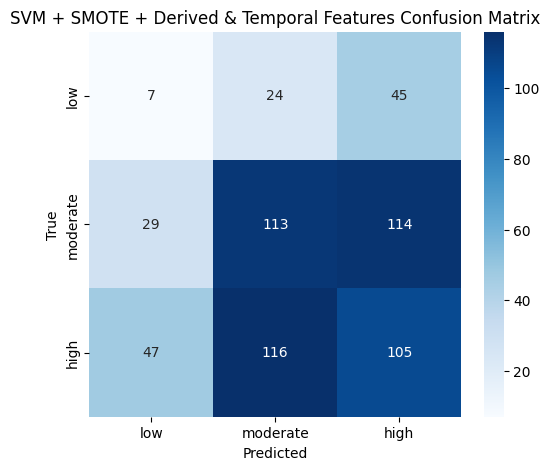

In [ ]:
# ===============================================
# SVM with SMOTE, Derived & Temporal Features
# ===============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================================
# 1. Load dataset
# ===============================================
df = pd.read_csv("stress_detection.csv")  # replace with your dataset path

# ===============================================
# 2. Create stress level labels
# ===============================================
def stress_label(score):
    if score <= 13:
        return "low"
    elif 14 <= score <= 26:
        return "moderate"
    else:
        return "high"

df["stress_level"] = df["PSS_score"].apply(stress_label)

# ===============================================
# 3. Derived Features
# ===============================================
df["screen_per_call"] = df["screen_on_time"] / (df["num_calls"] + 1)
df["mobility_efficiency"] = df["mobility_distance"] / (df["mobility_radius"] + 1)
df["sleep_efficiency"] = df["sleep_duration"] / (df["PSQI_score"] + 1)

df["sleep_time_sin"] = np.sin(2 * np.pi * df["sleep_time"]/24)
df["sleep_time_cos"] = np.cos(2 * np.pi * df["sleep_time"]/24)
df["wake_time_sin"] = np.sin(2 * np.pi * df["wake_time"]/24)
df["wake_time_cos"] = np.cos(2 * np.pi * df["wake_time"]/24)

# ===============================================
# 4. Temporal Features
# ===============================================
df.sort_values(["participant_id", "day"], inplace=True)

df["sleep_3day_avg"] = df.groupby("participant_id")["sleep_duration"].transform(lambda x: x.rolling(3, 1).mean())
df["mobility_3day_avg"] = df.groupby("participant_id")["mobility_distance"].transform(lambda x: x.rolling(3, 1).mean())
df["sleep_3day_std"] = df.groupby("participant_id")["sleep_duration"].transform(lambda x: x.rolling(3, 1).std())
df["mobility_3day_std"] = df.groupby("participant_id")["mobility_distance"].transform(lambda x: x.rolling(3, 1).std())
df["sleep_cum"] = df.groupby("participant_id")["sleep_duration"].cumsum()
df["mobility_cum"] = df.groupby("participant_id")["mobility_distance"].cumsum()

df.fillna(0, inplace=True)

# ===============================================
# 5. Select Features
# ===============================================
features = [
    "Openness","Conscientiousness","Extraversion","Agreeableness","Neuroticism",
    "sleep_duration","PSQI_score","call_duration","num_calls","num_sms","screen_on_time",
    "skin_conductance","accelerometer","mobility_radius","mobility_distance",
    "screen_per_call","mobility_efficiency","sleep_efficiency",
    "sleep_time_sin","sleep_time_cos","wake_time_sin","wake_time_cos",
    "sleep_3day_avg","mobility_3day_avg","sleep_3day_std","mobility_3day_std",
    "sleep_cum","mobility_cum"
]
X = df[features]
y = df["stress_level"]

# ===============================================
# 6. Train/Test Split
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================================
# 7. Feature Scaling (critical for SVM)
# ===============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================================
# 8. Apply SMOTE
# ===============================================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE :", pd.Series(y_train_res).value_counts())

# ===============================================
# 9. Train SVM (with optional GridSearch)
# ===============================================
# You can also use GridSearchCV to tune C and gamma
svm = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm.fit(X_train_res, y_train_res)

# ===============================================
# 10. Evaluate Model
# ===============================================
y_pred = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\n=== SVM + SMOTE + Derived & Temporal Features ===")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1 Score : {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ===============================================
# 11. Confusion Matrix
# ===============================================
cm = confusion_matrix(y_test, y_pred, labels=["low","moderate","high"])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["low","moderate","high"],
            yticklabels=["low","moderate","high"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM + SMOTE + Derived & Temporal Features Confusion Matrix")
plt.show()


Before SMOTE:
 stress_level
high        1074
moderate    1024
low          302
Name: count, dtype: int64
After SMOTE:
 stress_level
moderate    1074
low         1074
high        1074
Name: count, dtype: int64

=== AdaBoost + SMOTE + Derived & Temporal Features ===
Accuracy : 0.335
Precision: 0.346
Recall   : 0.327
F1 Score : 0.314

Classification Report:
               precision    recall  f1-score   support

        high       0.49      0.33      0.40       268
         low       0.11      0.30      0.16        76
    moderate       0.44      0.35      0.39       256

    accuracy                           0.34       600
   macro avg       0.35      0.33      0.31       600
weighted avg       0.42      0.34      0.36       600



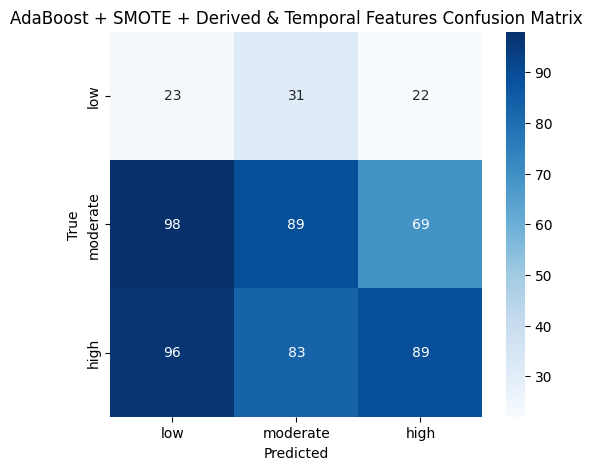

In [ ]:
# ===============================================
# AdaBoost with SMOTE, Derived & Temporal Features (scikit-learn >=1.2)
# ===============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================================
# 1. Load dataset
# ===============================================
df = pd.read_csv("stress_detection.csv")  # replace with your dataset path

# ===============================================
# 2. Create stress level labels (Cohen & Williamson)
# ===============================================
def stress_label(score):
    if score <= 13:
        return "low"
    elif 14 <= score <= 26:
        return "moderate"
    else:
        return "high"

df["stress_level"] = df["PSS_score"].apply(stress_label)

# ===============================================
# 3. Derived Features
# ===============================================
df["screen_per_call"] = df["screen_on_time"] / (df["num_calls"] + 1)
df["mobility_efficiency"] = df["mobility_distance"] / (df["mobility_radius"] + 1)
df["sleep_efficiency"] = df["sleep_duration"] / (df["PSQI_score"] + 1)

# Cyclic encoding for sleep/wake time
df["sleep_time_sin"] = np.sin(2 * np.pi * df["sleep_time"]/24)
df["sleep_time_cos"] = np.cos(2 * np.pi * df["sleep_time"]/24)
df["wake_time_sin"] = np.sin(2 * np.pi * df["wake_time"]/24)
df["wake_time_cos"] = np.cos(2 * np.pi * df["wake_time"]/24)

# ===============================================
# 4. Temporal Features
# ===============================================
df.sort_values(["participant_id", "day"], inplace=True)

# Rolling averages and std (3-day window)
df["sleep_3day_avg"] = df.groupby("participant_id")["sleep_duration"].transform(lambda x: x.rolling(3, 1).mean())
df["mobility_3day_avg"] = df.groupby("participant_id")["mobility_distance"].transform(lambda x: x.rolling(3, 1).mean())
df["sleep_3day_std"] = df.groupby("participant_id")["sleep_duration"].transform(lambda x: x.rolling(3, 1).std())
df["mobility_3day_std"] = df.groupby("participant_id")["mobility_distance"].transform(lambda x: x.rolling(3, 1).std())

# Cumulative sums
df["sleep_cum"] = df.groupby("participant_id")["sleep_duration"].cumsum()
df["mobility_cum"] = df.groupby("participant_id")["mobility_distance"].cumsum()

# Fill NaN values from std with 0
df.fillna(0, inplace=True)

# ===============================================
# 5. Select Features
# ===============================================
features = [
    "Openness","Conscientiousness","Extraversion","Agreeableness","Neuroticism",
    "sleep_duration","PSQI_score","call_duration","num_calls","num_sms","screen_on_time",
    "skin_conductance","accelerometer","mobility_radius","mobility_distance",
    "screen_per_call","mobility_efficiency","sleep_efficiency",
    "sleep_time_sin","sleep_time_cos","wake_time_sin","wake_time_cos",
    "sleep_3day_avg","mobility_3day_avg","sleep_3day_std","mobility_3day_std",
    "sleep_cum","mobility_cum"
]
X = df[features]
y = df["stress_level"]

# ===============================================
# 6. Train/Test Split
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================================
# 7. Feature Scaling (optional for AdaBoost)
# ===============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================================
# 8. Apply SMOTE
# ===============================================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_res).value_counts())

# ===============================================
# 9. Train AdaBoost Model
# ===============================================
# Use 'estimator' instead of 'base_estimator' (scikit-learn >=1.2)
base_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42)
ada = AdaBoostClassifier(
    estimator=base_tree,
    n_estimators=300,
    learning_rate=0.1,
    random_state=42
)
ada.fit(X_train_res, y_train_res)

# ===============================================
# 10. Evaluate Model
# ===============================================
y_pred = ada.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\n=== AdaBoost + SMOTE + Derived & Temporal Features ===")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1 Score : {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ===============================================
# 11. Confusion Matrix
# ===============================================
cm = confusion_matrix(y_test, y_pred, labels=["low","moderate","high"])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["low","moderate","high"],
            yticklabels=["low","moderate","high"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("AdaBoost + SMOTE + Derived & Temporal Features Confusion Matrix")
plt.show()


Number of datapoints per stress level:
low: 378
moderate: 1280
high: 1342


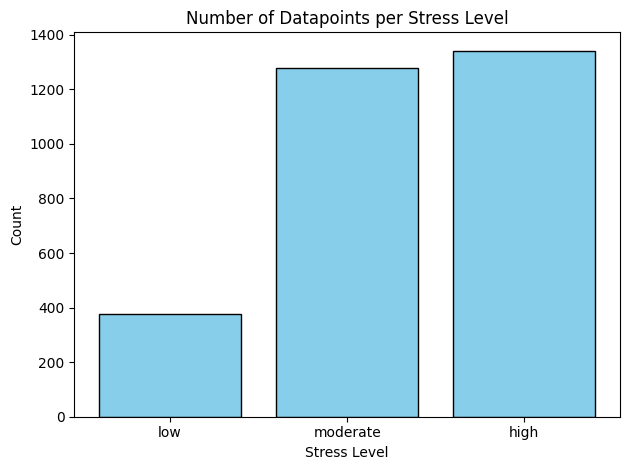

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('stress_detection.csv')

# Ensure the column exists
if 'PSS_score' not in df.columns:
    raise ValueError("The dataset must contain a 'PSS_score' column.")

# Define bins and labels for stress categories
# You can adjust the cutoffs as needed
bins = [0, 13, 26, df['PSS_score'].max()]  # Example cutoffs: 0–13 (low), 14–26 (moderate), 27+ (high)
labels = ['low', 'moderate', 'high']

# Create a new column for categorized stress levels
df['stress_level'] = pd.cut(df['PSS_score'], bins=bins, labels=labels, include_lowest=True)

# Count number of datapoints per label
label_counts = df['stress_level'].value_counts().sort_index()

# Print results
print("Number of datapoints per stress level:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

# Optional: visualize the distribution
plt.bar(label_counts.index, label_counts.values, color='skyblue', edgecolor='black')
plt.title("Number of Datapoints per Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('stress_detection.csv')

# Compute feature-target correlations
feature_target_corr = df.corr(method='spearman')['PSS_score'].drop('PSS_score')
print(feature_target_corr.sort_values(ascending=False))


num_sms              0.035401
day                  0.021531
skin_conductance     0.016495
Neuroticism          0.015743
Conscientiousness    0.011019
Extraversion         0.010518
mobility_radius      0.009054
Openness             0.008032
call_duration        0.006441
accelerometer        0.004480
screen_on_time       0.004009
Agreeableness       -0.002092
wake_time           -0.004658
participant_id      -0.012754
sleep_duration      -0.014562
sleep_time          -0.017848
PSQI_score          -0.021353
num_calls           -0.029653
mobility_distance   -0.034316
Name: PSS_score, dtype: float64


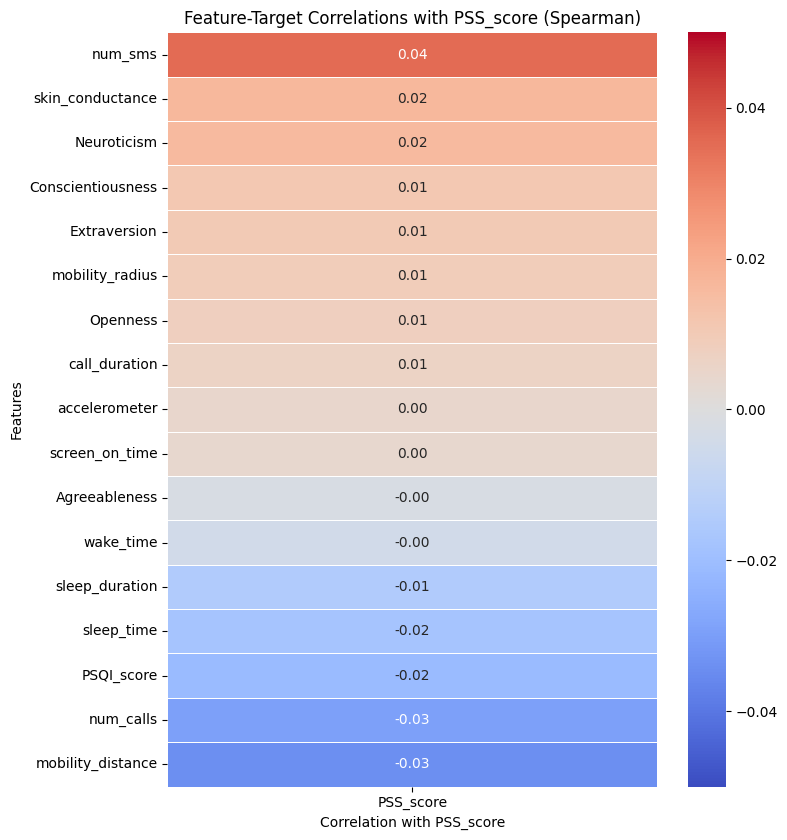

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("stress_detection.csv")

# Drop identifier columns: participant_id and day
df = df.drop(columns=[col for col in ['participant_id', 'day'] if col in df.columns])

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

# Compute Spearman correlation of each feature with target (PSS_score)
feature_target_corr = df[numeric_cols].corr(method='spearman')[['PSS_score']].drop('PSS_score')

# Sort: most positively correlated at top, most negatively correlated at bottom
feature_target_corr = feature_target_corr.sort_values(by='PSS_score', ascending=False)

# Plot heatmap
plt.figure(figsize=(8, len(feature_target_corr)*0.5))
sns.heatmap(
    feature_target_corr,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    linewidths=0.5,
    vmin = -0.05,
    vmax = 0.05
)
plt.title("Feature-Target Correlations with PSS_score (Spearman)")
plt.ylabel("Features")
plt.xlabel("Correlation with PSS_score")
plt.tight_layout()
plt.show()


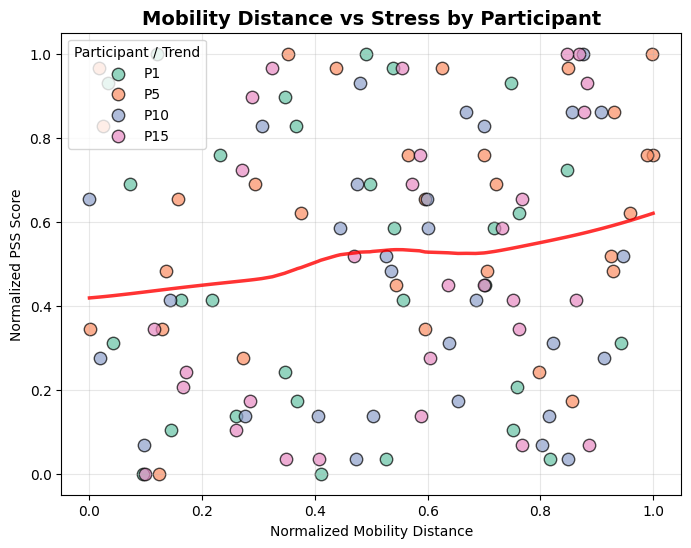

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("stress_detection.csv")

# Select subset of participants
selected_participants = [1, 5, 10, 15]
df_subset = df[df['participant_id'].isin(selected_participants)].copy()

# Assign colors for each participant
colors = sns.color_palette("Set2", len(selected_participants))
color_map = {pid: colors[idx] for idx, pid in enumerate(selected_participants)}
df_subset['color'] = df_subset['participant_id'].map(color_map)

# Normalize the columns
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df_subset['mobility_distance_norm'] = normalize(df_subset['mobility_distance'])
df_subset['PSS_norm'] = normalize(df_subset['PSS_score'])

# Plot normalized mobility_distance vs normalized PSS
plt.figure(figsize=(8,6))

# Scatter points per participant
for pid in selected_participants:
    subset = df_subset[df_subset['participant_id'] == pid]
    plt.scatter(subset['mobility_distance_norm'], subset['PSS_norm'],
                color=color_map[pid], s=80, alpha=0.7, edgecolor='black', label=f'P{pid}')

# Add LOWESS trend line
sns.regplot(
    data=df_subset,
    x='mobility_distance_norm',
    y='PSS_norm',
    scatter=False,
    lowess=True,
    line_kws={'color':'red', 'linewidth':2.5, 'alpha':0.8, 'label':'LOWESS Trend'}
)

plt.xlabel('Normalized Mobility Distance')
plt.ylabel('Normalized PSS Score')
plt.title('Mobility Distance vs Stress by Participant', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Participant / Trend')
plt.show()


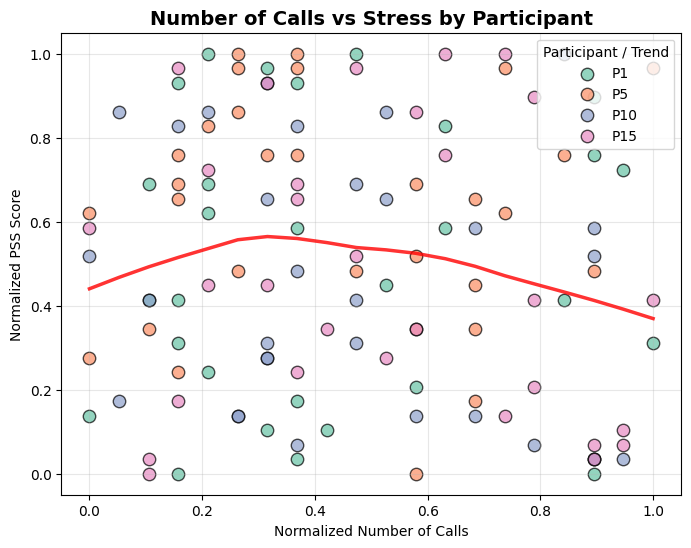

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("stress_detection.csv")

# Select subset of participants
selected_participants = [1, 5, 10, 15]
df_subset = df[df['participant_id'].isin(selected_participants)].copy()

# Assign colors for each participant
colors = sns.color_palette("Set2", len(selected_participants))
color_map = {pid: colors[idx] for idx, pid in enumerate(selected_participants)}
df_subset['color'] = df_subset['participant_id'].map(color_map)

# Normalize the columns
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df_subset['num_calls_norm'] = normalize(df_subset['num_calls'])
df_subset['PSS_norm'] = normalize(df_subset['PSS_score'])

# Plot normalized num_calls vs normalized PSS
plt.figure(figsize=(8,6))

# Scatter points per participant
for pid in selected_participants:
    subset = df_subset[df_subset['participant_id'] == pid]
    plt.scatter(subset['num_calls_norm'], subset['PSS_norm'],
                color=color_map[pid], s=80, alpha=0.7, edgecolor='black', label=f'P{pid}')

# Add LOWESS trend line
sns.regplot(
    data=df_subset,
    x='num_calls_norm',
    y='PSS_norm',
    scatter=False,
    lowess=True,
    line_kws={'color':'red', 'linewidth':2.5, 'alpha':0.8, 'label':'LOWESS Trend'}
)

plt.xlabel('Normalized Number of Calls')
plt.ylabel('Normalized PSS Score')
plt.title('Number of Calls vs Stress by Participant', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Participant / Trend')
plt.show()


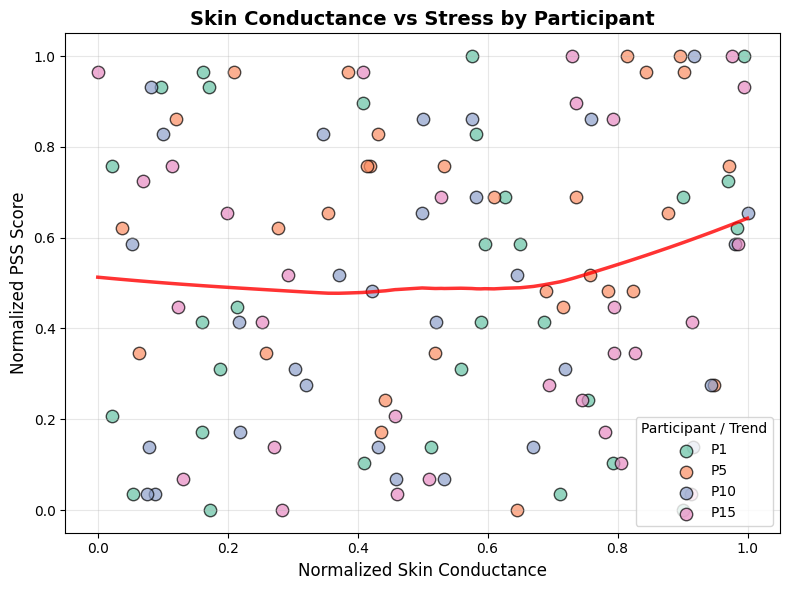

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("stress_detection.csv")

# Select subset of participants
selected_participants = [1, 5, 10, 15]
df_subset = df[df['participant_id'].isin(selected_participants)].copy()

# Assign colors for each participant
colors = sns.color_palette("Set2", len(selected_participants))
color_map = {pid: colors[idx] for idx, pid in enumerate(selected_participants)}
df_subset['color'] = df_subset['participant_id'].map(color_map)

# Normalize the columns
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df_subset['skin_conductance_norm'] = normalize(df_subset['skin_conductance'])
df_subset['PSS_norm'] = normalize(df_subset['PSS_score'])

# Plot normalized skin conductance vs normalized PSS
plt.figure(figsize=(8,6))

# Scatter points per participant
for pid in selected_participants:
    subset = df_subset[df_subset['participant_id'] == pid]
    plt.scatter(subset['skin_conductance_norm'], subset['PSS_norm'],
                color=color_map[pid], s=80, alpha=0.7, edgecolor='black', label=f'P{pid}')

# Add LOWESS (locally weighted smoothing) trend line
sns.regplot(
    data=df_subset,
    x='skin_conductance_norm',
    y='PSS_norm',
    scatter=False,
    lowess=True,
    line_kws={'color': 'red', 'linewidth': 2.5, 'alpha': 0.8, 'label': 'LOWESS Trend'}
)

plt.xlabel('Normalized Skin Conductance', fontsize=12)
plt.ylabel('Normalized PSS Score', fontsize=12)
plt.title('Skin Conductance vs Stress by Participant', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Participant / Trend')
plt.tight_layout()
plt.show()


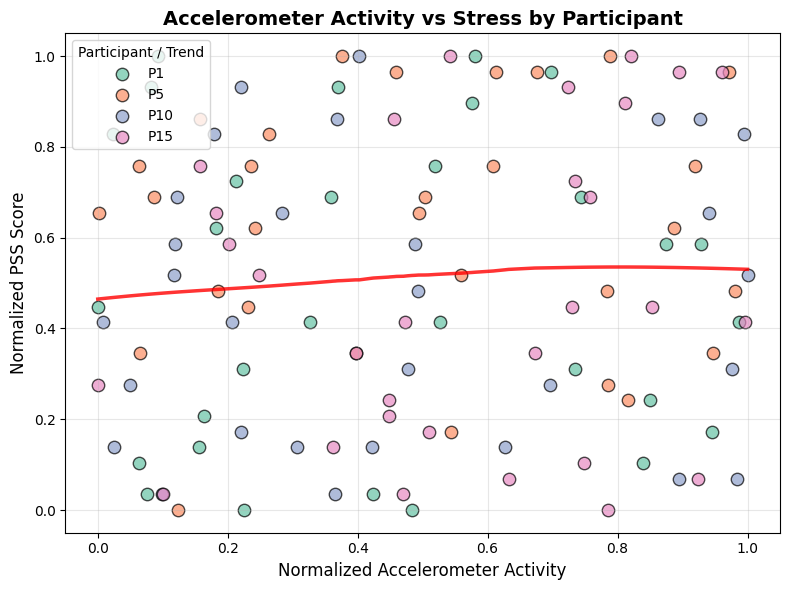

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("stress_detection.csv")

# Select subset of participants
selected_participants = [1, 5, 10, 15]
df_subset = df[df['participant_id'].isin(selected_participants)].copy()

# Assign colors for each participant
colors = sns.color_palette("Set2", len(selected_participants))
color_map = {pid: colors[idx] for idx, pid in enumerate(selected_participants)}
df_subset['color'] = df_subset['participant_id'].map(color_map)

# Normalize the columns
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df_subset['accelerometer_norm'] = normalize(df_subset['accelerometer'])
df_subset['PSS_norm'] = normalize(df_subset['PSS_score'])

# Plot normalized accelerometer vs normalized PSS
plt.figure(figsize=(8,6))

# Scatter points per participant
for pid in selected_participants:
    subset = df_subset[df_subset['participant_id'] == pid]
    plt.scatter(subset['accelerometer_norm'], subset['PSS_norm'],
                color=color_map[pid], s=80, alpha=0.7, edgecolor='black', label=f'P{pid}')

# Add LOWESS (locally weighted smoothing) trend line
sns.regplot(
    data=df_subset,
    x='accelerometer_norm',
    y='PSS_norm',
    scatter=False,
    lowess=True,
    line_kws={'color': 'red', 'linewidth': 2.5, 'alpha': 0.8, 'label': 'LOWESS Trend'}
)

plt.xlabel('Normalized Accelerometer Activity', fontsize=12)
plt.ylabel('Normalized PSS Score', fontsize=12)
plt.title('Accelerometer Activity vs Stress by Participant', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Participant / Trend')
plt.tight_layout()
plt.show()


Group 1: [84 54 71 46 45 40 23 81 11  1 19 31 74 34 91  5 77 78 13 32]
Group 2: [56 89 27 43 70 16 41 97 10 73 12 48 86 29 94  6 67 66 36 17]
Group 3: [50 35  8 96 28 20 82 26 63 14 25  4 18 39  9 79  7 65 37 90]
Group 4: [ 57 100  55  44  51  68  47  69  62  98  80  42  59  49  99  58  76  33
  95  60]
Group 5: [64 85 38 30  2 53 22  3 24 88 92 75 87 83 21 61 72 15 93 52]


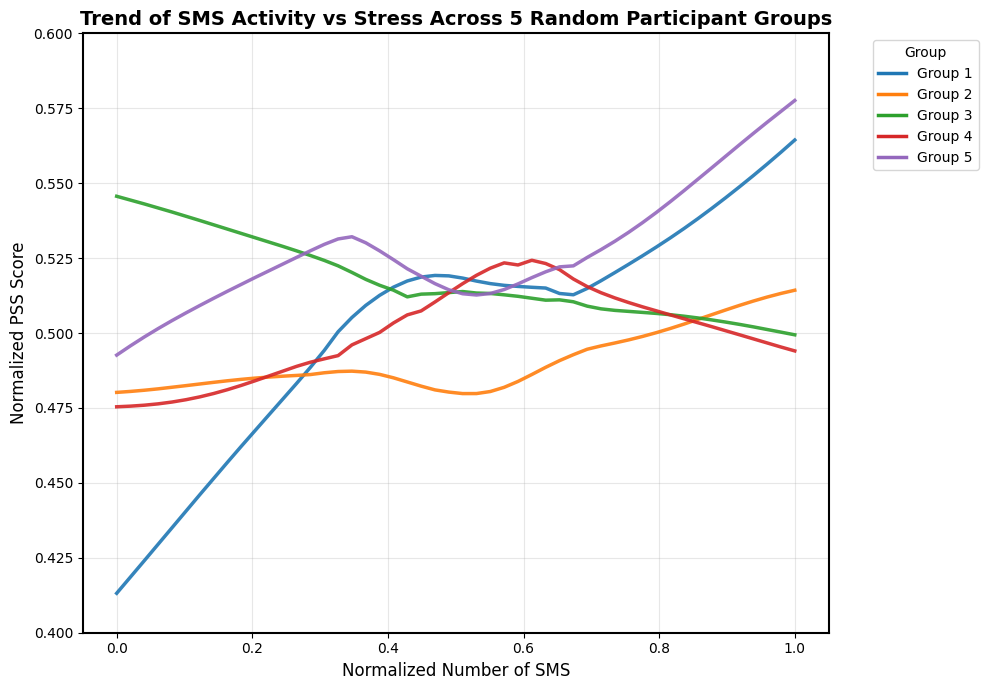

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D  # for custom legend

# --- Load dataset ---
df = pd.read_csv("stress_detection.csv")
df_subset = df.copy()

# --- Normalize relevant columns ---
df_subset['num_sms_norm'] = (df_subset['num_sms'] - df_subset['num_sms'].min()) / \
                            (df_subset['num_sms'].max() - df_subset['num_sms'].min())
df_subset['PSS_norm'] = (df_subset['PSS_score'] - df_subset['PSS_score'].min()) / \
                        (df_subset['PSS_score'].max() - df_subset['PSS_score'].min())

# --- Randomly split participants into 5 groups of 20 ---
unique_pids = df_subset['participant_id'].unique()
np.random.seed(42)  # reproducibility
np.random.shuffle(unique_pids)
groups = [unique_pids[i*20:(i+1)*20] for i in range(5)]

# --- Print participants in each group ---
for i, group in enumerate(groups, 1):
    print(f"Group {i}: {group}")

# --- Set up the plot ---
plt.figure(figsize=(10,7))

# Use visually appealing palette for 5 groups
colors = sns.color_palette("tab10", n_colors=5)

# --- Plot LOWESS trend for each group ---
for i, group in enumerate(groups, 1):
    group_df = df_subset[df_subset['participant_id'].isin(group)]
    sns.regplot(
        data=group_df,
        x='num_sms_norm', y='PSS_norm',
        scatter=False, lowess=True,
        line_kws={'color': colors[i-1], 'linewidth': 2.5, 'alpha': 0.9}
    )

# --- Create custom legend manually ---
legend_elements = [Line2D([0], [0], color=colors[i], lw=2.5, label=f'Group {i+1}') for i in range(5)]
plt.legend(handles=legend_elements, title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Style and labels ---
plt.xlabel('Normalized Number of SMS', fontsize=12)
plt.ylabel('Normalized PSS Score', fontsize=12)
plt.title('Trend of SMS Activity vs Stress Across 5 Random Participant Groups', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.ylim(.4, .6)

# --- Ensure all four spines are visible and black ---
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()


Group 1: [84 54 71 46 45 40 23 81 11  1 19 31 74 34 91  5 77 78 13 32]
Group 2: [56 89 27 43 70 16 41 97 10 73 12 48 86 29 94  6 67 66 36 17]
Group 3: [50 35  8 96 28 20 82 26 63 14 25  4 18 39  9 79  7 65 37 90]
Group 4: [ 57 100  55  44  51  68  47  69  62  98  80  42  59  49  99  58  76  33
  95  60]
Group 5: [64 85 38 30  2 53 22  3 24 88 92 75 87 83 21 61 72 15 93 52]


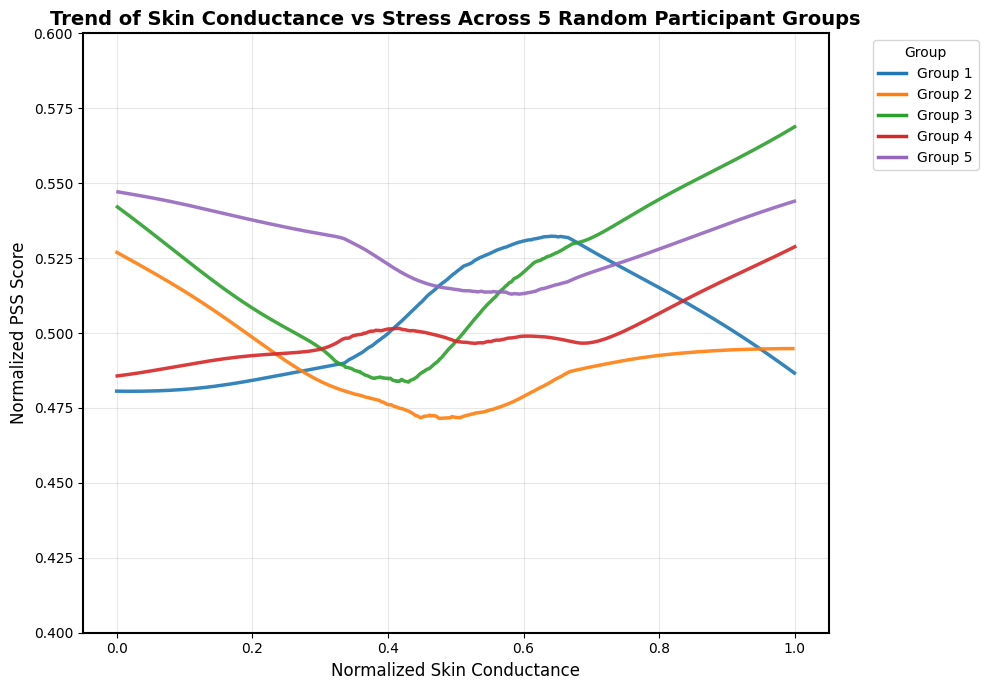

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D  # for custom legend

# --- Load dataset ---
df = pd.read_csv("stress_detection.csv")
df_subset = df.copy()

# --- Normalize relevant columns ---
df_subset['skin_conductance_norm'] = (df_subset['skin_conductance'] - df_subset['skin_conductance'].min()) / \
                                     (df_subset['skin_conductance'].max() - df_subset['skin_conductance'].min())
df_subset['PSS_norm'] = (df_subset['PSS_score'] - df_subset['PSS_score'].min()) / \
                        (df_subset['PSS_score'].max() - df_subset['PSS_score'].min())

# --- Randomly split participants into 5 groups of 20 ---
unique_pids = df_subset['participant_id'].unique()
np.random.seed(42)  # reproducibility
np.random.shuffle(unique_pids)
groups = [unique_pids[i*20:(i+1)*20] for i in range(5)]

# --- Print participants in each group ---
for i, group in enumerate(groups, 1):
    print(f"Group {i}: {group}")

# --- Set up the plot ---
plt.figure(figsize=(10,7))

# Use visually appealing palette for 5 groups
colors = sns.color_palette("tab10", n_colors=5)

# --- Plot LOWESS trend for each group ---
for i, group in enumerate(groups, 1):
    group_df = df_subset[df_subset['participant_id'].isin(group)]
    sns.regplot(
        data=group_df,
        x='skin_conductance_norm', y='PSS_norm',
        scatter=False, lowess=True,
        line_kws={'color': colors[i-1], 'linewidth': 2.5, 'alpha': 0.9}
    )

# --- Create custom legend manually ---
legend_elements = [Line2D([0], [0], color=colors[i], lw=2.5, label=f'Group {i+1}') for i in range(5)]
plt.legend(handles=legend_elements, title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Style and labels ---
plt.xlabel('Normalized Skin Conductance', fontsize=12)
plt.ylabel('Normalized PSS Score', fontsize=12)
plt.title('Trend of Skin Conductance vs Stress Across 5 Random Participant Groups', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.ylim(.4, .6)

# --- Ensure all four spines are visible and black ---
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()


Group 1: [84 54 71 46 45 40 23 81 11  1 19 31 74 34 91  5 77 78 13 32]
Group 2: [56 89 27 43 70 16 41 97 10 73 12 48 86 29 94  6 67 66 36 17]
Group 3: [50 35  8 96 28 20 82 26 63 14 25  4 18 39  9 79  7 65 37 90]
Group 4: [ 57 100  55  44  51  68  47  69  62  98  80  42  59  49  99  58  76  33
  95  60]
Group 5: [64 85 38 30  2 53 22  3 24 88 92 75 87 83 21 61 72 15 93 52]


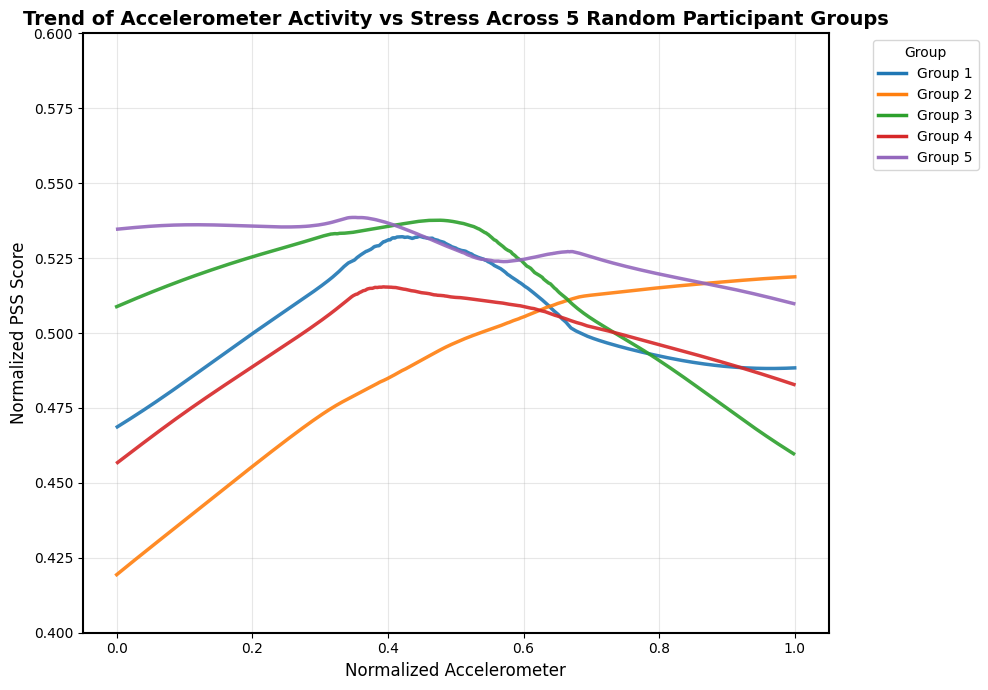

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D  # for custom legend

# --- Load dataset ---
df = pd.read_csv("stress_detection.csv")
df_subset = df.copy()

# --- Normalize relevant columns ---
df_subset['accelerometer_norm'] = (df_subset['accelerometer'] - df_subset['accelerometer'].min()) / \
                                  (df_subset['accelerometer'].max() - df_subset['accelerometer'].min())
df_subset['PSS_norm'] = (df_subset['PSS_score'] - df_subset['PSS_score'].min()) / \
                        (df_subset['PSS_score'].max() - df_subset['PSS_score'].min())

# --- Randomly split participants into 5 groups of 20 ---
unique_pids = df_subset['participant_id'].unique()
np.random.seed(42)  # reproducibility
np.random.shuffle(unique_pids)
groups = [unique_pids[i*20:(i+1)*20] for i in range(5)]

# --- Print participants in each group ---
for i, group in enumerate(groups, 1):
    print(f"Group {i}: {group}")

# --- Set up the plot ---
plt.figure(figsize=(10,7))

# Use visually appealing palette for 5 groups
colors = sns.color_palette("tab10", n_colors=5)

# --- Plot LOWESS trend for each group ---
for i, group in enumerate(groups, 1):
    group_df = df_subset[df_subset['participant_id'].isin(group)]
    sns.regplot(
        data=group_df,
        x='accelerometer_norm', y='PSS_norm',
        scatter=False, lowess=True,
        line_kws={'color': colors[i-1], 'linewidth': 2.5, 'alpha': 0.9}
    )

# --- Create custom legend manually ---
legend_elements = [Line2D([0], [0], color=colors[i], lw=2.5, label=f'Group {i+1}') for i in range(5)]
plt.legend(handles=legend_elements, title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Style and labels ---
plt.xlabel('Normalized Accelerometer', fontsize=12)
plt.ylabel('Normalized PSS Score', fontsize=12)
plt.title('Trend of Accelerometer Activity vs Stress Across 5 Random Participant Groups', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.ylim(0.4, 0.6)  # keep same y-axis range if desired

# --- Ensure all four spines are visible and black ---
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()


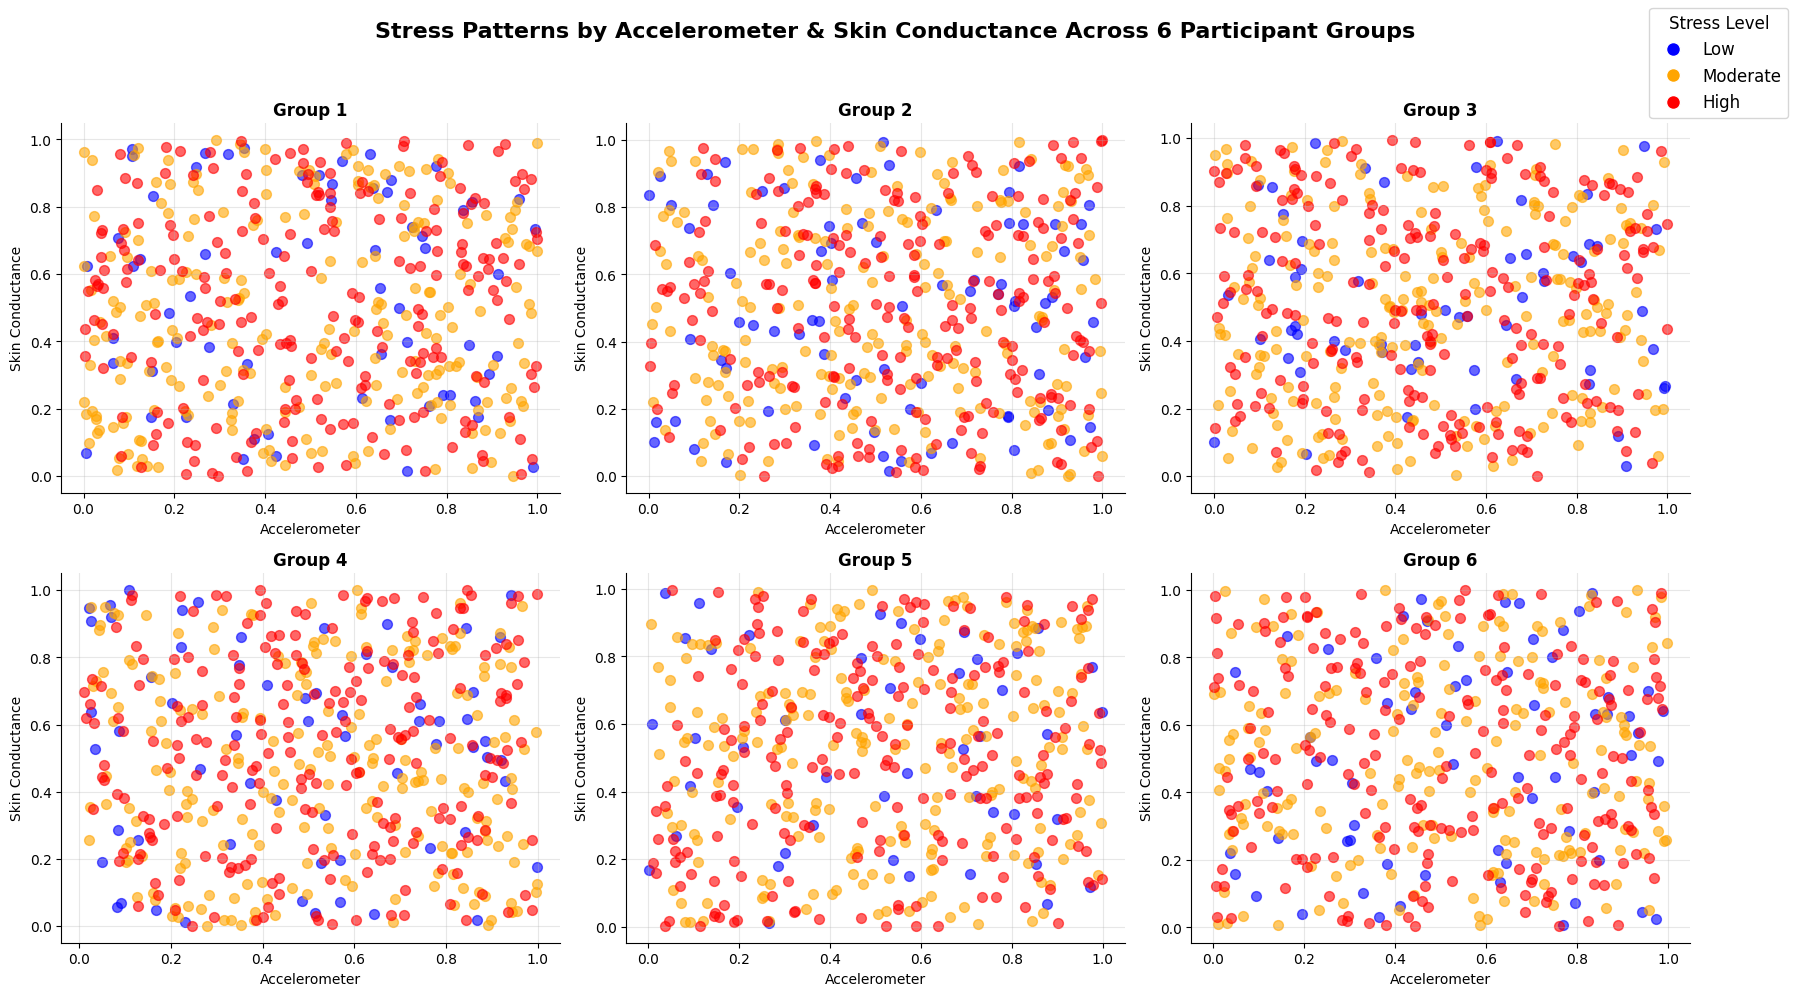

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D

# --- Load dataset ---
df = pd.read_csv("stress_detection.csv")

# --- Create multi-class stress variable ---
def stress_level(pss):
    if pss <= 13:
        return 'Low'
    elif pss <= 26:
        return 'Moderate'
    else:
        return 'High'

df['stress_class'] = df['PSS_score'].apply(stress_level)

# --- Normalize features ---
df['accelerometer_norm'] = (df['accelerometer'] - df['accelerometer'].min()) / (df['accelerometer'].max() - df['accelerometer'].min())
df['skin_conductance_norm'] = (df['skin_conductance'] - df['skin_conductance'].min()) / (df['skin_conductance'].max() - df['skin_conductance'].min())

# --- Randomly split participants into 6 groups ---
unique_pids = df['participant_id'].unique()
np.random.seed(42)
np.random.shuffle(unique_pids)
groups = np.array_split(unique_pids, 6)

# --- Set up subplots ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Colors for stress levels
stress_colors = {'Low':'blue','Moderate':'orange','High':'red'}

# --- Plot scatter points for each group ---
for i, group in enumerate(groups):
    ax = axes[i]
    group_df = df[df['participant_id'].isin(group)]

    for stress, color in stress_colors.items():
        subset = group_df[group_df['stress_class'] == stress]
        if not subset.empty:
            ax.scatter(
                subset['accelerometer_norm'],
                subset['skin_conductance_norm'],
                color=color,
                alpha=0.6,
                s=50,
                label=stress  # legend will be unified later
            )

    ax.set_title(f'Group {i+1}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Accelerometer', fontsize=10)
    ax.set_ylabel('Skin Conductance', fontsize=10)
    ax.grid(True, alpha=0.3)
    sns.despine(ax=ax)

# --- Unified legend ---
legend_elements = [Line2D([0],[0], marker='o', color='w', markerfacecolor=color, markersize=10, label=stress)
                   for stress, color in stress_colors.items()]
fig.legend(handles=legend_elements, title='Stress Level', loc='upper right', fontsize=12, title_fontsize=12)

plt.suptitle('Stress Patterns by Accelerometer & Skin Conductance Across 6 Participant Groups', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0,0,0.95,0.95])
plt.show()


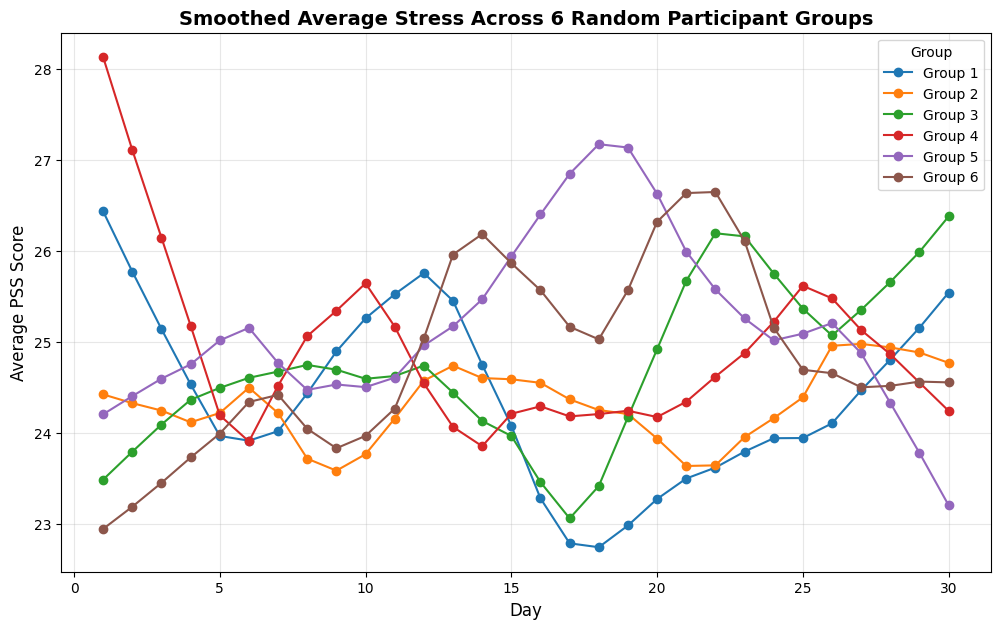

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# --- Load dataset ---
df = pd.read_csv("stress_detection.csv")
df_subset = df.copy()

# --- Randomly split participants into 6 groups ---
unique_pids = df_subset['participant_id'].unique()
np.random.seed(42)
np.random.shuffle(unique_pids)
groups = np.array_split(unique_pids, 6)

# --- Compute average PSS per day for each group ---
avg_stress_groups = pd.DataFrame()

for i, group in enumerate(groups, 1):
    group_df = df_subset[df_subset['participant_id'].isin(group)]
    avg_per_day = group_df.groupby('day')['PSS_score'].mean().reset_index()
    avg_per_day['Group'] = f'Group {i}'
    avg_stress_groups = pd.concat([avg_stress_groups, avg_per_day], axis=0)

# --- Plot ---
plt.figure(figsize=(12,7))
colors = sns.color_palette("tab10", n_colors=6)

for i, grp in enumerate(avg_stress_groups['Group'].unique()):
    grp_data = avg_stress_groups[avg_stress_groups['Group'] == grp]

    # LOWESS smoothing
    smoothed = lowess(grp_data['PSS_score'], grp_data['day'], frac=0.3)

    plt.plot(smoothed[:,0], smoothed[:,1], marker='o', linestyle='-', color=colors[i], label=grp)

plt.xlabel('Day', fontsize=12)
plt.ylabel('Average PSS Score', fontsize=12)
plt.title('Smoothed Average Stress Across 6 Random Participant Groups', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Group')
plt.show()


Group 1: [84 54 71 46 45 40 23 81 11  1 19 31 74 34 91  5 77 78 13 32]
Group 2: [56 89 27 43 70 16 41 97 10 73 12 48 86 29 94  6 67 66 36 17]
Group 3: [50 35  8 96 28 20 82 26 63 14 25  4 18 39  9 79  7 65 37 90]
Group 4: [ 57 100  55  44  51  68  47  69  62  98  80  42  59  49  99  58  76  33
  95  60]
Group 5: [64 85 38 30  2 53 22  3 24 88 92 75 87 83 21 61 72 15 93 52]


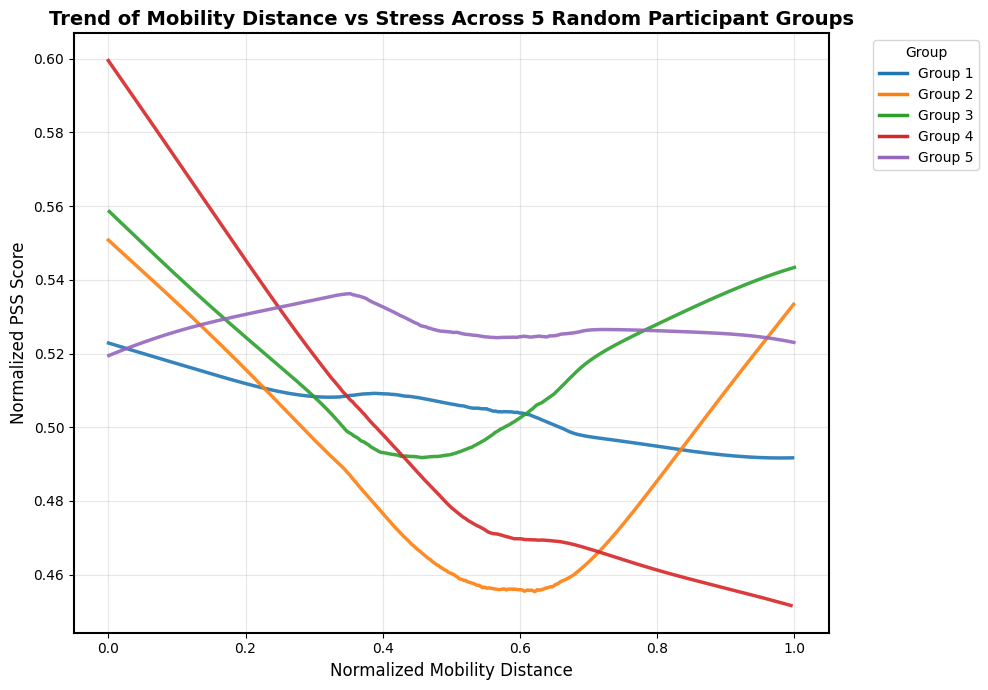

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D  # for custom legend

# --- Load dataset ---
df = pd.read_csv("stress_detection.csv")
df_subset = df.copy()

# --- Normalize relevant columns ---
df_subset['mobility_distance_norm'] = (df_subset['mobility_distance'] - df_subset['mobility_distance'].min()) / \
                                      (df_subset['mobility_distance'].max() - df_subset['mobility_distance'].min())
df_subset['PSS_norm'] = (df_subset['PSS_score'] - df_subset['PSS_score'].min()) / \
                        (df_subset['PSS_score'].max() - df_subset['PSS_score'].min())

# --- Randomly split participants into 5 groups of 20 ---
unique_pids = df_subset['participant_id'].unique()
np.random.seed(42)  # reproducibility
np.random.shuffle(unique_pids)
groups = [unique_pids[i*20:(i+1)*20] for i in range(5)]

# --- Print participants in each group ---
for i, group in enumerate(groups, 1):
    print(f"Group {i}: {group}")

# --- Set up the plot ---
plt.figure(figsize=(10,7))

# Use visually appealing palette for 5 groups
colors = sns.color_palette("tab10", n_colors=5)

# --- Plot LOWESS trend for each group ---
for i, group in enumerate(groups, 1):
    group_df = df_subset[df_subset['participant_id'].isin(group)]
    sns.regplot(
        data=group_df,
        x='mobility_distance_norm', y='PSS_norm',
        scatter=False, lowess=True,
        line_kws={'color': colors[i-1], 'linewidth': 2.5, 'alpha': 0.9}
    )

# --- Create custom legend manually ---
legend_elements = [Line2D([0], [0], color=colors[i], lw=2.5, label=f'Group {i+1}') for i in range(5)]
plt.legend(handles=legend_elements, title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Style and labels ---
plt.xlabel('Normalized Mobility Distance', fontsize=12)
plt.ylabel('Normalized PSS Score', fontsize=12)
plt.title('Trend of Mobility Distance vs Stress Across 5 Random Participant Groups', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# --- Ensure all four spines are visible and black ---
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()


Group 1: [84 54 71 46 45 40 23 81 11  1 19 31 74 34 91  5 77 78 13 32]
Group 2: [56 89 27 43 70 16 41 97 10 73 12 48 86 29 94  6 67 66 36 17]
Group 3: [50 35  8 96 28 20 82 26 63 14 25  4 18 39  9 79  7 65 37 90]
Group 4: [ 57 100  55  44  51  68  47  69  62  98  80  42  59  49  99  58  76  33
  95  60]
Group 5: [64 85 38 30  2 53 22  3 24 88 92 75 87 83 21 61 72 15 93 52]


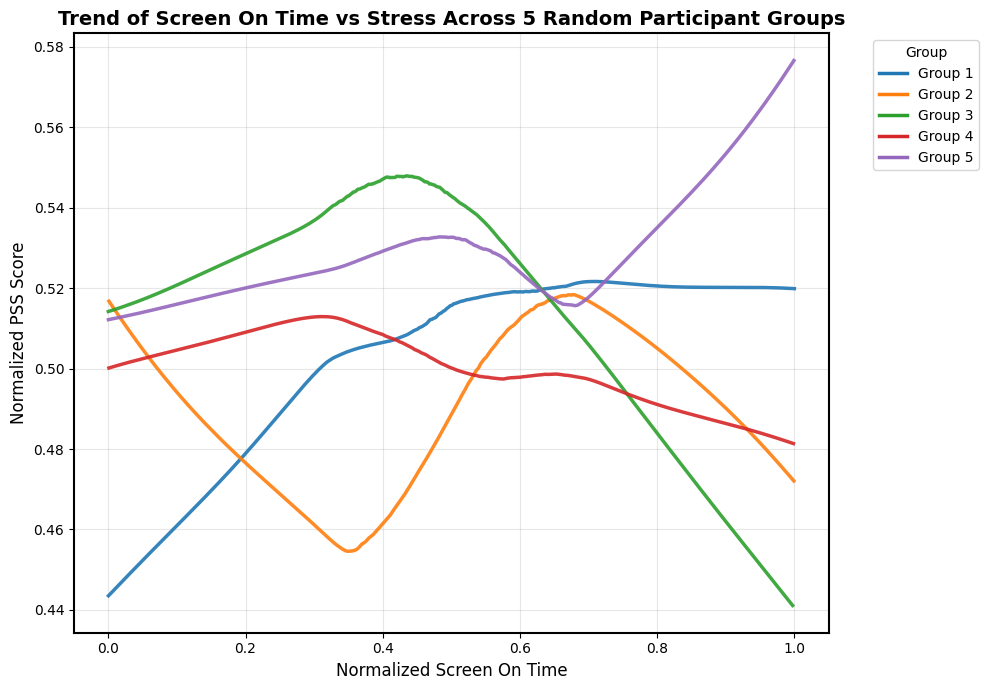

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D  # for custom legend

# --- Load dataset ---
df = pd.read_csv("stress_detection.csv")
df_subset = df.copy()

# --- Normalize relevant columns ---
df_subset['screen_on_time_norm'] = (df_subset['screen_on_time'] - df_subset['screen_on_time'].min()) / \
                                   (df_subset['screen_on_time'].max() - df_subset['screen_on_time'].min())
df_subset['PSS_norm'] = (df_subset['PSS_score'] - df_subset['PSS_score'].min()) / \
                        (df_subset['PSS_score'].max() - df_subset['PSS_score'].min())

# --- Randomly split participants into 5 groups of 20 ---
unique_pids = df_subset['participant_id'].unique()
np.random.seed(42)  # reproducibility
np.random.shuffle(unique_pids)
groups = [unique_pids[i*20:(i+1)*20] for i in range(5)]

# --- Print participants in each group ---
for i, group in enumerate(groups, 1):
    print(f"Group {i}: {group}")

# --- Set up the plot ---
plt.figure(figsize=(10,7))

# Use visually appealing palette for 5 groups
colors = sns.color_palette("tab10", n_colors=5)

# --- Plot LOWESS trend for each group ---
for i, group in enumerate(groups, 1):
    group_df = df_subset[df_subset['participant_id'].isin(group)]
    sns.regplot(
        data=group_df,
        x='screen_on_time_norm', y='PSS_norm',
        scatter=False, lowess=True,
        line_kws={'color': colors[i-1], 'linewidth': 2.5, 'alpha': 0.9}
    )

# --- Create custom legend manually ---
legend_elements = [Line2D([0], [0], color=colors[i], lw=2.5, label=f'Group {i+1}') for i in range(5)]
plt.legend(handles=legend_elements, title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Style and labels ---
plt.xlabel('Normalized Screen On Time', fontsize=12)
plt.ylabel('Normalized PSS Score', fontsize=12)
plt.title('Trend of Screen On Time vs Stress Across 5 Random Participant Groups', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# --- Ensure all four spines are visible and black ---
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()


Group 1: [84 54 71 46 45 40 23 81 11  1 19 31 74 34 91  5 77 78 13 32]
Group 2: [56 89 27 43 70 16 41 97 10 73 12 48 86 29 94  6 67 66 36 17]
Group 3: [50 35  8 96 28 20 82 26 63 14 25  4 18 39  9 79  7 65 37 90]
Group 4: [ 57 100  55  44  51  68  47  69  62  98  80  42  59  49  99  58  76  33
  95  60]
Group 5: [64 85 38 30  2 53 22  3 24 88 92 75 87 83 21 61 72 15 93 52]


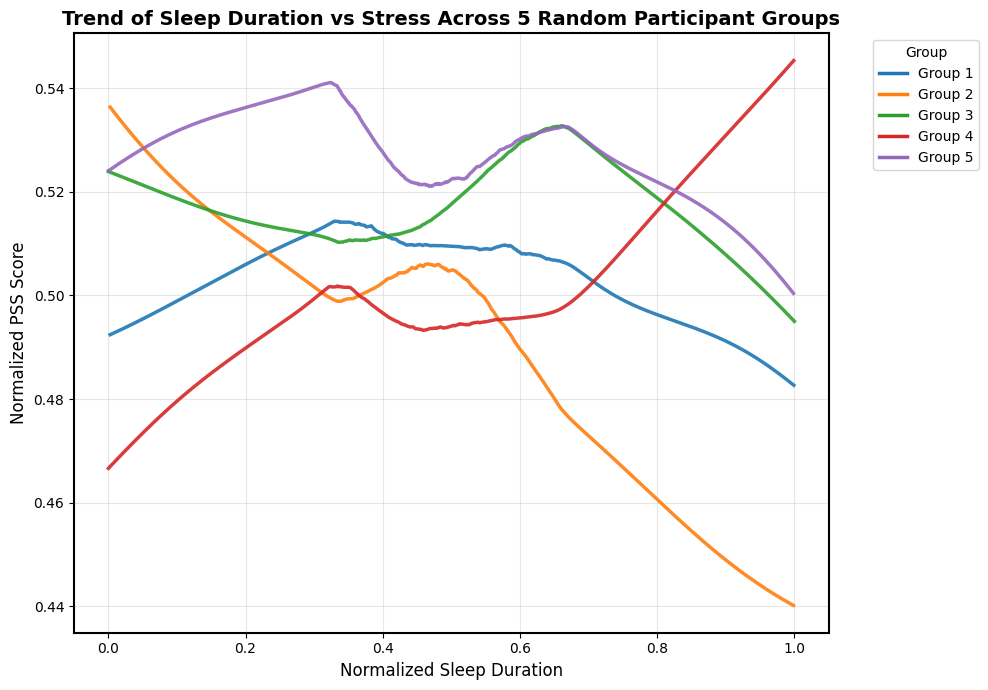

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D  # for custom legend

# --- Load dataset ---
df = pd.read_csv("stress_detection.csv")
df_subset = df.copy()

# --- Normalize relevant columns ---
df_subset['sleep_duration_norm'] = (df_subset['sleep_duration'] - df_subset['sleep_duration'].min()) / \
                                   (df_subset['sleep_duration'].max() - df_subset['sleep_duration'].min())
df_subset['PSS_norm'] = (df_subset['PSS_score'] - df_subset['PSS_score'].min()) / \
                        (df_subset['PSS_score'].max() - df_subset['PSS_score'].min())

# --- Randomly split participants into 5 groups of 20 ---
unique_pids = df_subset['participant_id'].unique()
np.random.seed(42)  # reproducibility
np.random.shuffle(unique_pids)
groups = [unique_pids[i*20:(i+1)*20] for i in range(5)]

# --- Print participants in each group ---
for i, group in enumerate(groups, 1):
    print(f"Group {i}: {group}")

# --- Set up the plot ---
plt.figure(figsize=(10,7))

# Use visually appealing palette for 5 groups
colors = sns.color_palette("tab10", n_colors=5)

# --- Plot LOWESS trend for each group ---
for i, group in enumerate(groups, 1):
    group_df = df_subset[df_subset['participant_id'].isin(group)]
    sns.regplot(
        data=group_df,
        x='sleep_duration_norm', y='PSS_norm',
        scatter=False, lowess=True,
        line_kws={'color': colors[i-1], 'linewidth': 2.5, 'alpha': 0.9}
    )

# --- Create custom legend manually ---
legend_elements = [Line2D([0], [0], color=colors[i], lw=2.5, label=f'Group {i+1}') for i in range(5)]
plt.legend(handles=legend_elements, title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Style and labels ---
plt.xlabel('Normalized Sleep Duration', fontsize=12)
plt.ylabel('Normalized PSS Score', fontsize=12)
plt.title('Trend of Sleep Duration vs Stress Across 5 Random Participant Groups', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# --- Ensure all four spines are visible and black ---
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()


Group 1: [84 54 71 46 45 40 23 81 11  1 19 31 74 34 91  5 77 78 13 32]
Group 2: [56 89 27 43 70 16 41 97 10 73 12 48 86 29 94  6 67 66 36 17]
Group 3: [50 35  8 96 28 20 82 26 63 14 25  4 18 39  9 79  7 65 37 90]
Group 4: [ 57 100  55  44  51  68  47  69  62  98  80  42  59  49  99  58  76  33
  95  60]
Group 5: [64 85 38 30  2 53 22  3 24 88 92 75 87 83 21 61 72 15 93 52]


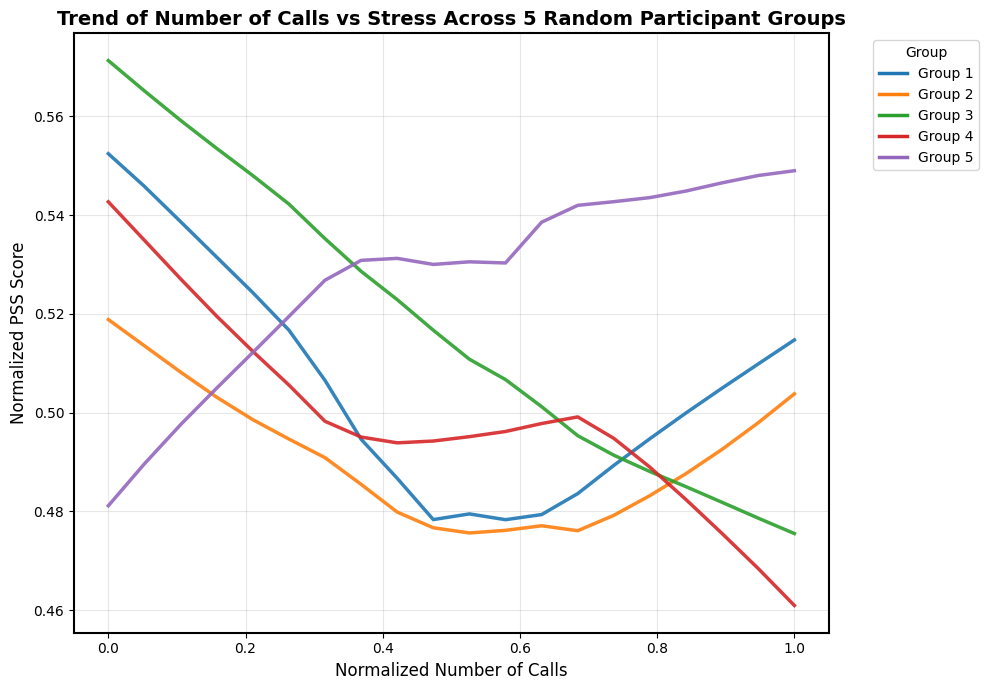

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D  # for custom legend

# --- Load dataset ---
df = pd.read_csv("stress_detection.csv")
df_subset = df.copy()

# --- Normalize relevant columns ---
df_subset['num_calls_norm'] = (df_subset['num_calls'] - df_subset['num_calls'].min()) / \
                              (df_subset['num_calls'].max() - df_subset['num_calls'].min())
df_subset['PSS_norm'] = (df_subset['PSS_score'] - df_subset['PSS_score'].min()) / \
                        (df_subset['PSS_score'].max() - df_subset['PSS_score'].min())

# --- Randomly split participants into 5 groups of 20 ---
unique_pids = df_subset['participant_id'].unique()
np.random.seed(42)  # reproducibility
np.random.shuffle(unique_pids)
groups = [unique_pids[i*20:(i+1)*20] for i in range(5)]

# --- Print participants in each group ---
for i, group in enumerate(groups, 1):
    print(f"Group {i}: {group}")

# --- Set up the plot ---
plt.figure(figsize=(10,7))

# Use visually appealing palette for 5 groups
colors = sns.color_palette("tab10", n_colors=5)

# --- Plot LOWESS trend for each group ---
for i, group in enumerate(groups, 1):
    group_df = df_subset[df_subset['participant_id'].isin(group)]
    sns.regplot(
        data=group_df,
        x='num_calls_norm', y='PSS_norm',
        scatter=False, lowess=True,
        line_kws={'color': colors[i-1], 'linewidth': 2.5, 'alpha': 0.9}
    )

# --- Create custom legend manually ---
legend_elements = [Line2D([0], [0], color=colors[i], lw=2.5, label=f'Group {i+1}') for i in range(5)]
plt.legend(handles=legend_elements, title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Style and labels ---
plt.xlabel('Normalized Number of Calls', fontsize=12)
plt.ylabel('Normalized PSS Score', fontsize=12)
plt.title('Trend of Number of Calls vs Stress Across 5 Random Participant Groups', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# --- Ensure all four spines are visible and black ---
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()


In [67]:
import numpy as np
import pandas as pd

# --- Load dataset ---
df = pd.read_csv("stress_detection.csv")

# --- Get unique participant IDs ---
unique_pids = df['participant_id'].unique()

# --- Shuffle participants ---
np.random.seed(42)  # reproducibility
np.random.shuffle(unique_pids)

# --- Split into 5 groups of 20 ---
groups = [unique_pids[i*20:(i+1)*20] for i in range(5)]

# --- Print participants in each group ---
for i, group in enumerate(groups, 1):
    print(f"Group {i}: {group}")


Group 1: [84 54 71 46 45 40 23 81 11  1 19 31 74 34 91  5 77 78 13 32]
Group 2: [56 89 27 43 70 16 41 97 10 73 12 48 86 29 94  6 67 66 36 17]
Group 3: [50 35  8 96 28 20 82 26 63 14 25  4 18 39  9 79  7 65 37 90]
Group 4: [ 57 100  55  44  51  68  47  69  62  98  80  42  59  49  99  58  76  33
  95  60]
Group 5: [64 85 38 30  2 53 22  3 24 88 92 75 87 83 21 61 72 15 93 52]


Balanced training dataset saved as 'stress_detection_train_smote.csv'


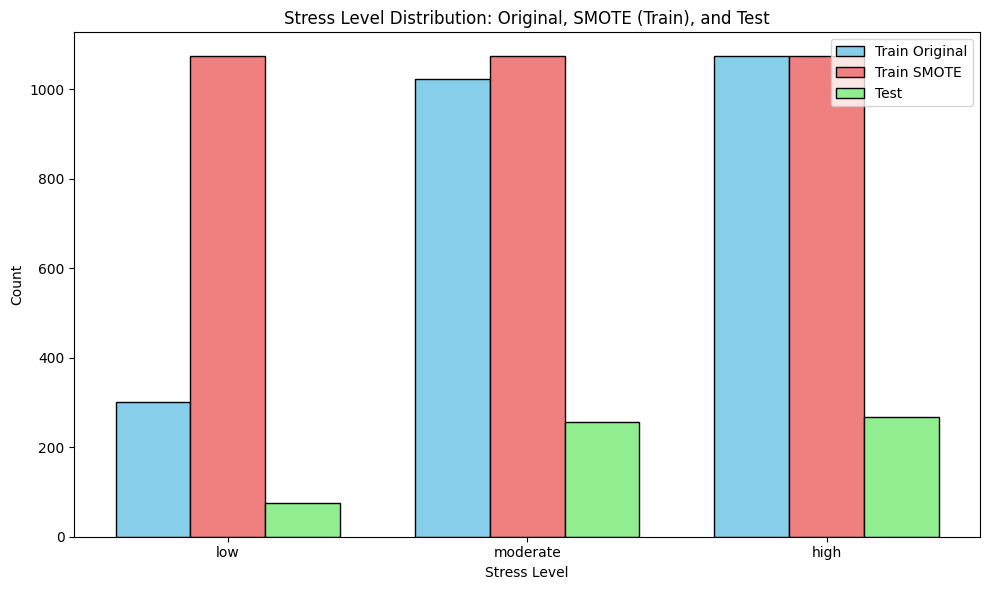

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# --- Load dataset ---
df = pd.read_csv('stress_detection.csv')

# --- Ensure the column exists ---
if 'PSS_score' not in df.columns:
    raise ValueError("The dataset must contain a 'PSS_score' column.")

# --- Categorize stress levels ---
bins = [0, 13, 26, df['PSS_score'].max()]  # 0-13 low, 14-26 moderate, 27+ high
labels = ['low', 'moderate', 'high']
df['stress_level'] = pd.cut(df['PSS_score'], bins=bins, labels=labels, include_lowest=True)

# --- Prepare features and target ---
X = df.select_dtypes(include='number').drop(columns=['PSS_score']).values
y = df['stress_level'].values

# Encode target labels for SMOTE
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # le.classes_ preserves alphabetical order

# --- Split into training and test sets (stratified) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# --- Count distribution before SMOTE ---
counts_train_before = pd.Series(le.inverse_transform(y_train)).value_counts().reindex(labels)
counts_test = pd.Series(le.inverse_transform(y_test)).value_counts().reindex(labels)

# --- Apply SMOTE only to training data ---
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Decode SMOTE labels
y_train_resampled_labels = le.inverse_transform(y_train_resampled)
counts_train_after = pd.Series(y_train_resampled_labels).value_counts().reindex(labels)

# --- Save SMOTE-balanced training set to CSV ---
train_resampled_df = pd.DataFrame(X_train_resampled, columns=df.select_dtypes(include='number').drop(columns=['PSS_score']).columns)
train_resampled_df['stress_level'] = y_train_resampled_labels
train_resampled_df.to_csv('stress_detection_train_smote.csv', index=False)
print("Balanced training dataset saved as 'stress_detection_train_smote.csv'")

# --- Visualization ---
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, counts_train_before.values, width, label='Train Original', color='skyblue', edgecolor='black')
plt.bar(x, counts_train_after.values, width, label='Train SMOTE', color='lightcoral', edgecolor='black')
plt.bar(x + width, counts_test.values, width, label='Test', color='lightgreen', edgecolor='black')

plt.xticks(x, labels)
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.title("Stress Level Distribution: Original, SMOTE (Train), and Test")
plt.legend()
plt.tight_layout()
plt.show()


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# --- Load the full dataset ---
df = pd.read_csv('stress_detection.csv')

# --- Ensure 'PSS_score' exists ---
if 'PSS_score' not in df.columns:
    raise ValueError("The dataset must contain a 'PSS_score' column.")

# --- Define stress level categories ---
bins = [0, 13, 26, df['PSS_score'].max()]  # 0-13: low, 14-26: moderate, 27+: high
labels = ['low', 'moderate', 'high']
df['stress_level'] = pd.cut(df['PSS_score'], bins=bins, labels=labels, include_lowest=True)

# --- Features and target ---
feature_columns = df.select_dtypes(include='number').drop(columns=['PSS_score']).columns
X = df[feature_columns].values
y = df['stress_level'].values

# --- Encode target labels for SMOTE ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- Split into train and test (test remains untouched, stratified by label) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# --- Apply SMOTE only on training data ---
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# --- Decode labels back to original ---
y_train_res_labels = le.inverse_transform(y_train_res)
y_test_labels = le.inverse_transform(y_test)

# --- Save SMOTE-balanced training set to CSV ---
train_balanced_df = pd.DataFrame(X_train_res, columns=feature_columns)
train_balanced_df['stress_level'] = y_train_res_labels
train_balanced_df.to_csv('stress_detection_train_smote.csv', index=False)

# --- Save the original test set to CSV ---
test_df = pd.DataFrame(X_test, columns=feature_columns)
test_df['stress_level'] = y_test_labels
test_df.to_csv('stress_detection_test_smote.csv', index=False)

print("Balanced training set and original test set saved successfully.")


Balanced training set and original test set saved successfully.


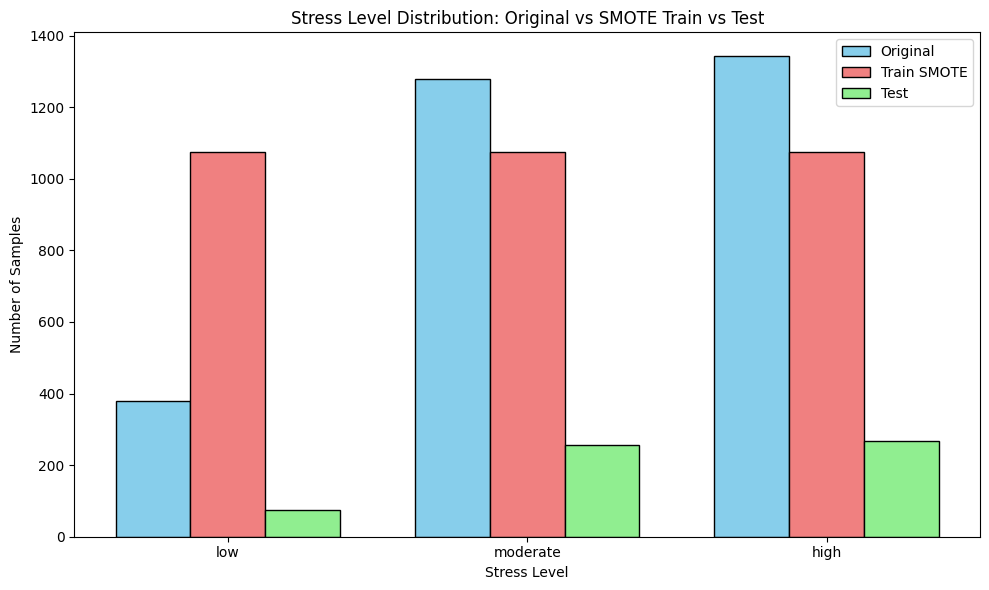

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Load datasets ---
original_df = pd.read_csv('stress_detection.csv')
train_smote_df = pd.read_csv('stress_detection_train_smote.csv')
test_smote_df = pd.read_csv('stress_detection_test_smote.csv')

# --- Define stress level bins and labels ---
bins = [0, 13, 26, original_df['PSS_score'].max()]
labels = ['low', 'moderate', 'high']

# --- Categorize stress levels for original dataset ---
original_df['stress_level'] = pd.cut(original_df['PSS_score'], bins=bins, labels=labels, include_lowest=True)

# --- Ensure train and test datasets have 'stress_level' column ---
# If they already have the column, this will not overwrite it
for df_ in [train_smote_df, test_smote_df]:
    if 'stress_level' not in df_.columns and 'PSS_score' in df_.columns:
        df_['stress_level'] = pd.cut(df_['PSS_score'], bins=bins, labels=labels, include_lowest=True)

# --- Extract distributions ---
orig_counts = original_df['stress_level'].value_counts().reindex(labels)
train_counts = train_smote_df['stress_level'].value_counts().reindex(labels)
test_counts = test_smote_df['stress_level'].value_counts().reindex(labels)

# --- Set up bar chart ---
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, orig_counts.values, width, label='Original', color='skyblue', edgecolor='black')
plt.bar(x, train_counts.values, width, label='Train SMOTE', color='lightcoral', edgecolor='black')
plt.bar(x + width, test_counts.values, width, label='Test', color='lightgreen', edgecolor='black')

# --- Labels and title ---
plt.xticks(x, labels)
plt.xlabel("Stress Level")
plt.ylabel("Number of Samples")
plt.title("Stress Level Distribution: Original vs SMOTE Train vs Test")
plt.legend()
plt.tight_layout()
plt.show()


Training distribution before SMOTE:
low          302
moderate    1024
high        1074
Name: count, dtype: int64
Test distribution (unchanged):
low          76
moderate    256
high        268
Name: count, dtype: int64
Balanced training set and original test set saved successfully.


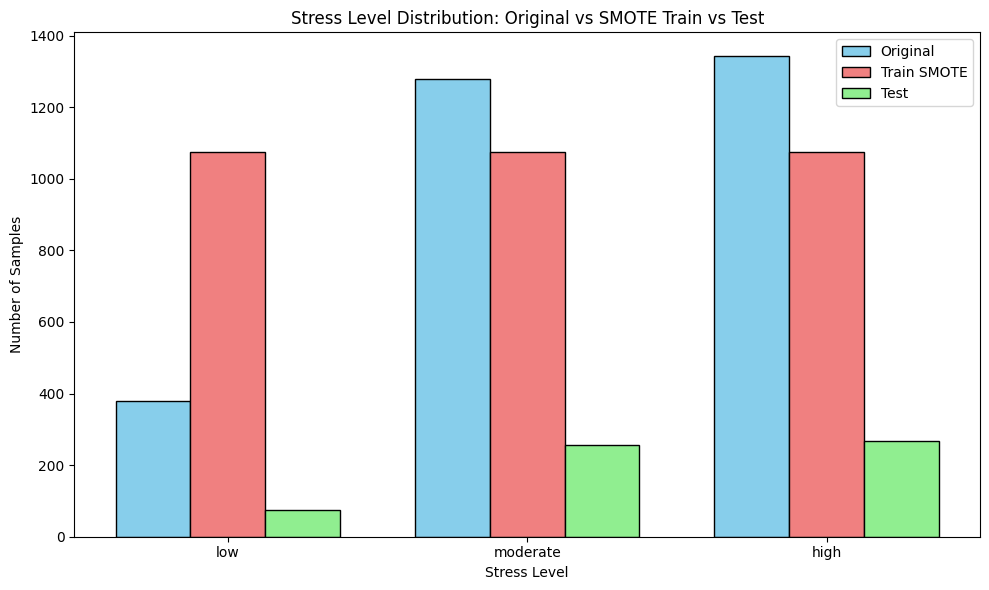

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv('stress_detection.csv')

# -----------------------------
# 2. Categorize stress levels
# -----------------------------
bins = [0, 13, 26, df['PSS_score'].max()]  # low:0-13, moderate:14-26, high:27+
labels = ['low', 'moderate', 'high']
df['stress_level'] = pd.cut(df['PSS_score'], bins=bins, labels=labels, include_lowest=True)

# -----------------------------
# 3. Features and target
# -----------------------------
X = df.select_dtypes(include='number').drop(columns=['PSS_score']).values
y = df['stress_level'].values

# Encode target labels for SMOTE
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# -----------------------------
# 4. Stratified split (test untouched)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Check original distributions
print("Training distribution before SMOTE:")
print(pd.Series(le.inverse_transform(y_train)).value_counts().reindex(labels))
print("Test distribution (unchanged):")
print(pd.Series(le.inverse_transform(y_test)).value_counts().reindex(labels))

# -----------------------------
# 5. Apply SMOTE only on training data
# -----------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Decode labels back to original
y_train_res_labels = le.inverse_transform(y_train_res)
y_test_labels = le.inverse_transform(y_test)

# -----------------------------
# 6. Save CSVs
# -----------------------------
train_balanced_df = pd.DataFrame(X_train_res, columns=df.select_dtypes(include='number').drop(columns=['PSS_score']).columns)
train_balanced_df['stress_level'] = y_train_res_labels
train_balanced_df.to_csv('stress_detection_train_smote.csv', index=False)

test_df = pd.DataFrame(X_test, columns=df.select_dtypes(include='number').drop(columns=['PSS_score']).columns)
test_df['stress_level'] = y_test_labels
test_df.to_csv('stress_detection_test.csv', index=False)

print("Balanced training set and original test set saved successfully.")

# -----------------------------
# 7. Visualize distributions
# -----------------------------
# Reindex counts to ensure consistent order
original_counts = df['stress_level'].value_counts().reindex(labels)
train_counts = pd.Series(y_train_res_labels).value_counts().reindex(labels)
test_counts = pd.Series(y_test_labels).value_counts().reindex(labels)

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, original_counts.values, width, label='Original', color='skyblue', edgecolor='black')
plt.bar(x, train_counts.values, width, label='Train SMOTE', color='lightcoral', edgecolor='black')
plt.bar(x + width, test_counts.values, width, label='Test', color='lightgreen', edgecolor='black')

plt.xticks(x, labels)
plt.xlabel("Stress Level")
plt.ylabel("Number of Samples")
plt.title("Stress Level Distribution: Original vs SMOTE Train vs Test")
plt.legend()
plt.tight_layout()
plt.show()


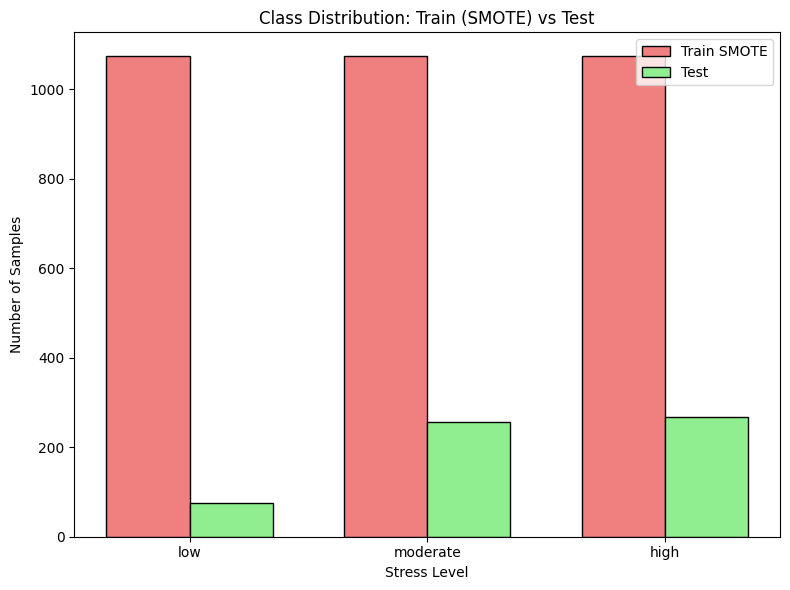

Training set distribution (SMOTE):
stress_level
low         1074
moderate    1074
high        1074
Name: count, dtype: int64

Test set distribution:
stress_level
low          76
moderate    256
high        268
Name: count, dtype: int64


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Load the datasets ---
train_df = pd.read_csv('stress_detection_train_smote.csv')
test_df = pd.read_csv('stress_detection_test_smote.csv')

# --- Ensure the stress_level column exists ---
for df_name, df in [('Train', train_df), ('Test', test_df)]:
    if 'stress_level' not in df.columns:
        raise ValueError(f"The {df_name} dataset must contain a 'stress_level' column.")

# --- Define the stress level order ---
labels = ['low', 'moderate', 'high']

# --- Count samples per class ---
train_counts = train_df['stress_level'].value_counts().reindex(labels)
test_counts = test_df['stress_level'].value_counts().reindex(labels)

# --- Plot the distributions side by side ---
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x - width/2, train_counts.values, width, label='Train SMOTE', color='lightcoral', edgecolor='black')
plt.bar(x + width/2, test_counts.values, width, label='Test', color='lightgreen', edgecolor='black')

plt.xticks(x, labels)
plt.xlabel("Stress Level")
plt.ylabel("Number of Samples")
plt.title("Class Distribution: Train (SMOTE) vs Test")
plt.legend()
plt.tight_layout()
plt.show()

# --- Print counts for reference ---
print("Training set distribution (SMOTE):")
print(train_counts)
print("\nTest set distribution:")
print(test_counts)
